# **Standard Imports and Useful Functions**



In [3]:
#importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.odr as odr
from scipy.optimize import least_squares, curve_fit

pd.set_option('display.max_rows', None)

In [19]:
from matplotlib.backends.backend_pdf import PdfPages

def _draw_as_table(df, pagesize):
    alternating_colors = [['white'] * len(df.columns), ['lightgray'] * len(df.columns)] * len(df)
    alternating_colors = alternating_colors[:len(df)]
    fig, ax = plt.subplots(figsize=pagesize)
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=df.values,
                        rowLabels=df.index,
                        colLabels=df.columns,
                        rowColours=['lightblue']*len(df),
                        colColours=['lightblue']*len(df.columns),
                        cellColours=alternating_colors,
                        loc='center')
    return fig
  

def dataframe_to_pdf(df, filename, numpages=(1, 1), pagesize=(11, 8.5)):
  with PdfPages(filename) as pdf:
    nh, nv = numpages
    rows_per_page = len(df) // nh
    cols_per_page = len(df.columns) // nv
    for i in range(0, nh):
        for j in range(0, nv):
            page = df.iloc[(i*rows_per_page):min((i+1)*rows_per_page, len(df)),
                           (j*cols_per_page):min((j+1)*cols_per_page, len(df.columns))]
            fig = _draw_as_table(page, pagesize)
            if nh > 1 or nv > 1:
                # Add a part/page number at bottom-center of page
                fig.text(0.5, 0.5/pagesize[0],
                         "Part-{}x{}: Page-{}".format(i+1, j+1, i*nv + j + 1),
                         ha='center', fontsize=8)
            pdf.savefig(fig, bbox_inches='tight')
            
            plt.close()


In [4]:
def fitFunc(p, x):
    '''
    Fit function
    '''
    f= p[0]*x+p[1]

    return f

def fitFuncDiff(p, x):
    '''
    Differential of fit function
    '''
    df= p[0]
    return df

def calcChiSq(p, x, y, xerr, yerr):
    '''
    Error function for fit
    '''
    e = (y - fitFunc(p, x))/(np.sqrt(yerr**2 + fitFuncDiff(p, x)**2*xerr**2))
    return e



def fitStdError(jacMatrix):

    # Compute covariance
    jMat2 = np.dot(jacMatrix.T, jacMatrix)
    detJmat2 = np.linalg.det(jMat2)
    
    # Prepare output
    output = np.zeros(jMat2.shape[0])
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        return output
    else:
        covar = np.linalg.inv(jMat2)
        for i in range(len(output)):
            output[i] = np.sqrt(covar[i, i])
            
        return output

    
    
    

# **Modelling Crystal Powder Diffraction**

## Body\-centred cubic



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype

$h$  $k$  $l$  $exp(iq\cdot R_{1})$  $exp(iq \cdot R_{2})$  $|A_{hkl}|$  \
0      0    0    1              1.0+0.0j              -1.0+0.0j          0.0   
1      0    0    2              1.0+0.0j               1.0-0.0j          2.0   
2      0    0    3              1.0+0.0j              -1.0+0.0j          0.0   
3      0    0    4              1.0+0.0j               1.0-0.0j          2.0   
4      0    1    0              1.0+0.0j              -1.0+0.0j          0.0   
5      0    1    1              1.0+0.0j               1.0-0.0j          2.0   
6      0    1    2              1.0+0.0j              -1.0+0.0j          0.0   
7      0    1    3              1.0+0.0j               1.0-0.0j          2.0   
8      0    1    4              1.0+0.0j              -1.0+0.0j          0.0   
9      0    2    0              1.0+0.0j               1.0-0.0j          2.0   
10     0    2    1              1.0+0.0j              -1.0+0.0j          0.0   
11     0    2    2              1.0+0.0j               1.0-0.0j          2.0   
12     0    2    3              1.0+0.0j              -1.0+0.0j          0.0   
13     0    2    4              1.0+0.0j               1.0-0.0j          2.0   
14     0    3    0              1.0+0.0j              -1.0+0.0j          0.0   
15     0    3    1              1.0+0.0j               1.0-0.0j          2.0   
16     0    3    2              1.0+0.0j              -1.0+0.0j          0.0   
17     0    3    3              1.0+0.0j               1.0-0.0j          2.0   
18     0    3    4              1.0+0.0j              -1.0+0.0j          0.0   
19     0    4    0              1.0+0.0j               1.0-0.0j          2.0   
20     0    4    1              1.0+0.0j              -1.0+0.0j          0.0   
21     0    4    2              1.0+0.0j               1.0-0.0j          2.0   
22     0    4    3              1.0+0.0j              -1.0+0.0j          0.0   
23     0    4    4              1.0+0.0j               1.0-0.0j          2.0   
24     1    0    0              1.0+0.0j              -1.0+0.0j          0.0   
25     1    0    1              1.0+0.0j               1.0-0.0j          2.0   
26     1    0    2              1.0+0.0j              -1.0+0.0j          0.0   
27     1    0    3              1.0+0.0j               1.0-0.0j          2.0   
28     1    0    4              1.0+0.0j              -1.0+0.0j          0.0   
29     1    1    0              1.0+0.0j               1.0-0.0j          2.0   
30     1    1    1              1.0+0.0j              -1.0+0.0j          0.0   
31     1    1    2              1.0+0.0j               1.0-0.0j          2.0   
32     1    1    3              1.0+0.0j              -1.0+0.0j          0.0   
33     1    1    4              1.0+0.0j               1.0-0.0j          2.0   
34     1    2    0              1.0+0.0j              -1.0+0.0j          0.0   
35     1    2    1              1.0+0.0j               1.0-0.0j          2.0   
36     1    2    2              1.0+0.0j              -1.0+0.0j          0.0   
37     1    2    3              1.0+0.0j               1.0-0.0j          2.0   
38     1    2    4              1.0+0.0j              -1.0+0.0j          0.0   
39     1    3    0              1.0+0.0j               1.0-0.0j          2.0   
40     1    3    1              1.0+0.0j              -1.0+0.0j          0.0   
41     1    3    2              1.0+0.0j               1.0-0.0j          2.0   
42     1    3    3              1.0+0.0j              -1.0+0.0j          0.0   
43     1    3    4              1.0+0.0j               1.0-0.0j          2.0   
44     1    4    0              1.0+0.0j              -1.0+0.0j          0.0   
45     1    4    1              1.0+0.0j               1.0-0.0j          2.0   
46     1    4    2              1.0+0.0j              -1.0+0.0j          0.0   
47     1    4    3              1.0+0.0j               1.0-0.0j          2.0   
48     1    4    4              1.0+0.0j              -1.0+0.0j          0.0   
49   

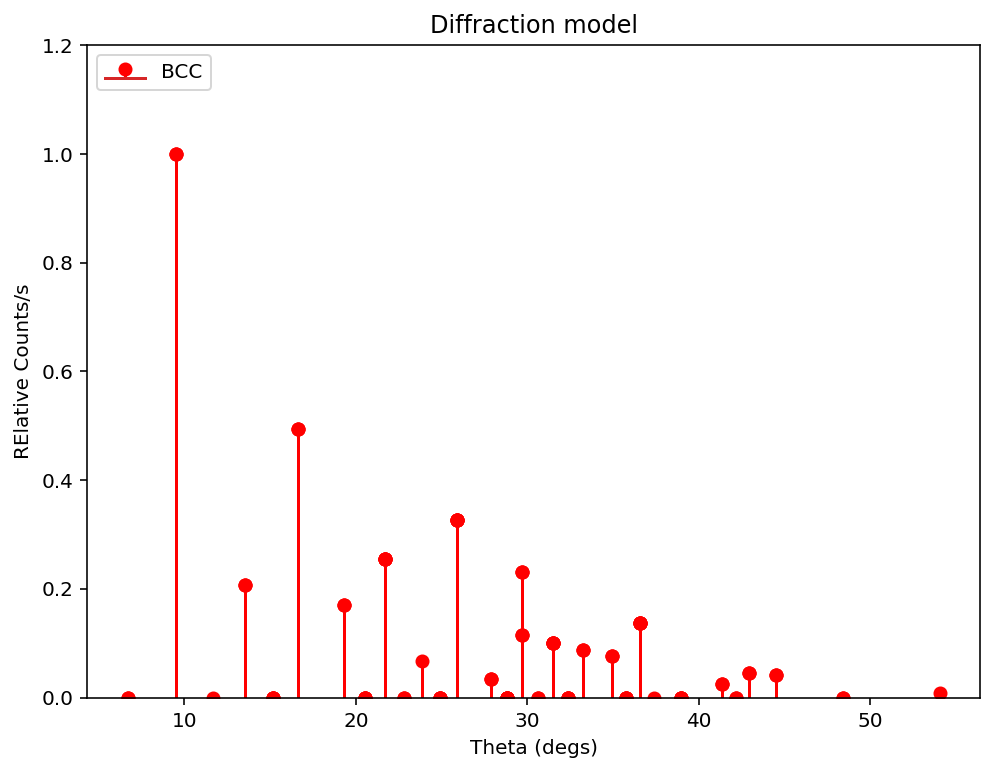

<Figure size 864x504 with 0 Axes>

In [5]:

A=1 #for single element BCC
wavelength=0.154*1e-9 #wavelength in metres
a= 0.659*1e-9 #lattice constant in metres

n=2 #number of atoms

#Defining positions of each atom
positions=np.zeros((n,3))
positions[0,:]=0,0,0
positions[1,:]=0.5,0.5,0.5

atoms=np.linspace(1,n,n,dtype=int)

#making a dataframe of postions
df = pd.DataFrame(positions,columns=('x','y','z'),index=atoms)
df['Ai']=(1,1)

#Finding the miller indicies
indicies=[]
for h in range(0,5):
    for k in range(0,5):
        for l in range(0,5):
            new=[h,k,l]
            indicies=np.append(indicies,new).reshape(-1,3) #array of all miller indicies
indicies=np.delete(indicies,0,0) #plane (0,0,0) will mess with our results

#Finding the recioprocal space
q=((2*np.pi))*indicies #array of reciprical spaces


#Finding the structure factor for each position
aValues=[]
for x in range(0,len(q)):
    working=[]
    for y in range(0, len(positions)):
        value=(np.cos(np.dot(q[x,],positions[y,]))+(1j*np.sin(np.dot(q[x,],positions[y,]))))
        working=np.append(working,value)
    aValues=np.append(aValues,working).reshape(-1,len(positions))

#Summing the structure factors to find the total one for each plane
aFinal=np.abs(np.sum(aValues,axis=1))

#Finding the intensity 
intensity=aFinal*aFinal

#Finding the Bragg angle for each plane
angle=[]
for x in range(0,len(indicies)):
    d=np.sqrt((a**2)/((indicies[x,0]**2)+(indicies[x,1]**2)+(indicies[x,2]**2)))
    newAngle=np.arcsin(wavelength/(2*d))
    angle=np.append(angle,newAngle)

#converting to degrees
theta=np.degrees(angle)

    
#Finding the multiplicities ofr each plane
multiplicities=[]
for x in range(0,len(angle)):
    mult=np.count_nonzero(angle==angle[x])
    multiplicities=np.append(multiplicities,mult)


#finding index multiplicities
index=[]
for u in range(0,len(indicies)):
    count=np.count_nonzero(indicies[u])
    index=np.append(index,2**count)

#finding lorentz polarization factor
LP=[]
for w in range(0,len(angle)):
    value=1/(angle[w]**(5/2))
    LP=np.append(LP,value)

#Finding mornalised real intensity
I=[]
for g in range(0,len(angle)):
    number=intensity[g]*multiplicities[g]*index[g]*LP[g]
    I=np.append(I,number)
#normalising
maximum=np.amax(I)
IFinal=I/maximum

#Displaying the table
df=pd.DataFrame((indicies[:,0],indicies[:,1],indicies[:,2],aValues[:,0],aValues[:,1],aFinal,intensity,angle,theta,multiplicities,index,LP,IFinal))
df=df.transpose()
df=df.round(decimals=2)
df.columns=["$h$","$k$","$l$","$exp(iq\cdot R_{1})$","$exp(iq \cdot R_{2})$","$|A_{hkl}|$","$I_{hkl}$","$\theta_{bragg}\newline \small{(rad)}$","$\theta_{bragg}\newline \small{(deg)}$","$\theta_{multiplicity}$","$\theta_{index}$","$LP$","$I_{real}\newline \small{(normalised)}$"]
df=df.astype(dtype={"$h$":"int64","$k$":"int64","$l$":"int64","$|A_{hkl}|$":"float64","$I_{hkl}$":"float64","$\theta_{bragg}\newline \small{(rad)}$":"float64","$\theta_{bragg}\newline \small{(deg)}$":"float64","$\theta_{multiplicity}$":"int64","$\theta_{index}$":"int64","$LP$":"int64","$I_{real}\newline \small{(normalised)}$":"float64"})
display(df)


#plotting graph
xData=theta
yData=IFinal
fig=plt.figure(figsize=(8,6))
plt.title('Diffraction model')
plt.xlabel('Theta (degs)')
plt.ylabel('RElative Counts/s')
plt.stem(xData,yData, linefmt='red', bottom=-10,label='BCC')
plt.ylim(0.0,1.2)
plt.legend(loc=2)
plt.show(fig)

df.to_csv('BCC.csv')
plt.savefig('BCC Simulation.png')

## Caesium Chloride \(CsCl\)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype

$h$  $k$  $l$  $exp(iq\cdot R_{1})$  $exp(iq \cdot R_{2})$  $|A_{hkl}|$  \
0     0    0    1             17.0+0.0j             -10.0+0.0j          7.0   
1     0    0    2             17.0+0.0j              10.0-0.0j         27.0   
2     0    0    3             17.0+0.0j             -10.0+0.0j          7.0   
3     0    0    4             17.0+0.0j              10.0-0.0j         27.0   
4     0    1    0             17.0+0.0j             -10.0+0.0j          7.0   
5     0    1    1             17.0+0.0j              10.0-0.0j         27.0   
6     0    1    2             17.0+0.0j             -10.0+0.0j          7.0   
7     0    1    3             17.0+0.0j              10.0-0.0j         27.0   
8     0    1    4             17.0+0.0j             -10.0+0.0j          7.0   
9     0    2    0             17.0+0.0j              10.0-0.0j         27.0   
10    0    2    1             17.0+0.0j             -10.0+0.0j          7.0   
11    0    2    2             17.0+0.0j              10.0-0.0j         27.0   
12    0    2    3             17.0+0.0j             -10.0+0.0j          7.0   
13    0    2    4             17.0+0.0j              10.0-0.0j         27.0   
14    0    3    0             17.0+0.0j             -10.0+0.0j          7.0   
15    0    3    1             17.0+0.0j              10.0-0.0j         27.0   
16    0    3    2             17.0+0.0j             -10.0+0.0j          7.0   
17    0    3    3             17.0+0.0j              10.0-0.0j         27.0   
18    0    3    4             17.0+0.0j             -10.0+0.0j          7.0   
19    1    0    0             17.0+0.0j             -10.0+0.0j          7.0   
20    1    0    1             17.0+0.0j              10.0-0.0j         27.0   
21    1    0    2             17.0+0.0j             -10.0+0.0j          7.0   
22    1    0    3             17.0+0.0j              10.0-0.0j         27.0   
23    1    0    4             17.0+0.0j             -10.0+0.0j          7.0   
24    1    1    0             17.0+0.0j              10.0-0.0j         27.0   
25    1    1    1             17.0+0.0j             -10.0+0.0j          7.0   
26    1    1    2             17.0+0.0j              10.0-0.0j         27.0   
27    1    1    3             17.0+0.0j             -10.0+0.0j          7.0   
28    1    1    4             17.0+0.0j              10.0-0.0j         27.0   
29    1    2    0             17.0+0.0j             -10.0+0.0j          7.0   
30    1    2    1             17.0+0.0j              10.0-0.0j         27.0   
31    1    2    2             17.0+0.0j             -10.0+0.0j          7.0   
32    1    2    3             17.0+0.0j              10.0-0.0j         27.0   
33    1    2    4             17.0+0.0j             -10.0+0.0j          7.0   
34    1    3    0             17.0+0.0j              10.0-0.0j         27.0   
35    1    3    1             17.0+0.0j             -10.0+0.0j          7.0   
36    1    3    2             17.0+0.0j              10.0-0.0j         27.0   
37    1    3    3             17.0+0.0j             -10.0+0.0j          7.0   
38    1    3    4             17.0+0.0j              10.0-0.0j         27.0   
39    2    0    0             17.0+0.0j              10.0-0.0j         27.0   
40    2    0    1             17.0+0.0j             -10.0+0.0j          7.0   
41    2    0    2             17.0+0.0j              10.0-0.0j         27.0   
42    2    0    3             17.0+0.0j             -10.0+0.0j          7.0   
43    2    0    4             17.0+0.0j              10.0-0.0j         27.0   
44    2    1    0             17.0+0.0j             -10.0+0.0j          7.0   
45    2    1    1             17.0+0.0j              10.0-0.0j         27.0   
46    2    1    2             17.0+0.0j             -10.0+0.0j          7.0   
47    2    1    3             17.0+0.0j              10.0-0.0j         27.0   
48    2    1    4             17.0+0.0j             -10.0+0.0j          7.0   
49    2    2    0             17.0+0.0j              1

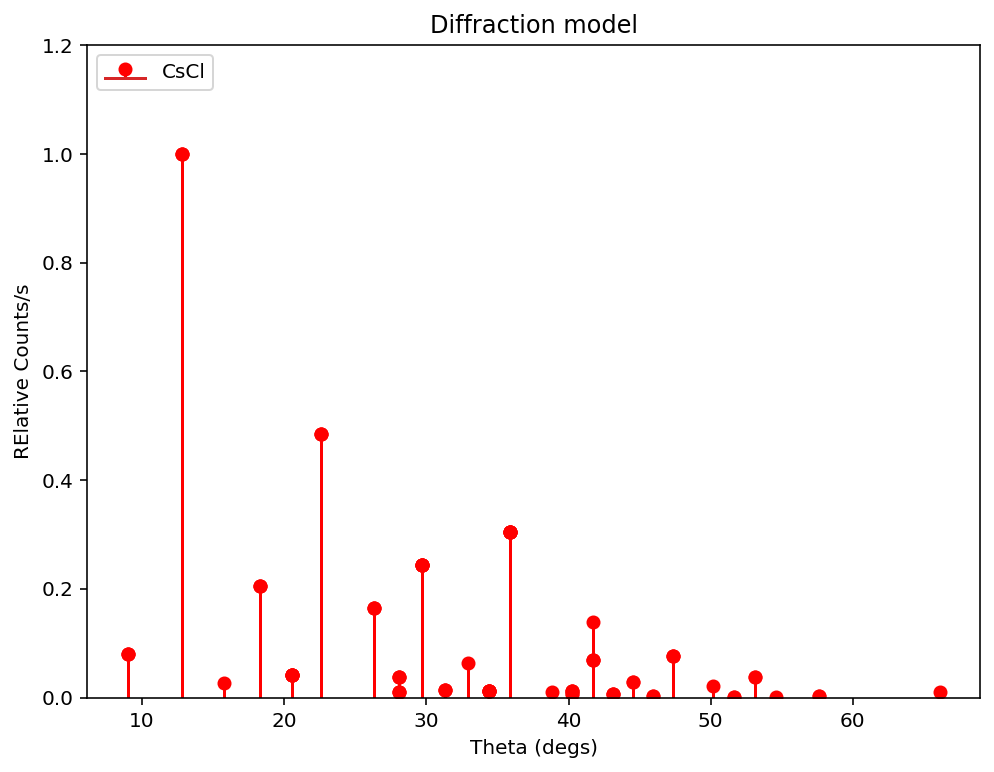

/tmp/ipykernel_323/996329847.py:34: UserWarning: Glyph 9 (	) missing from current font.
  pdf.savefig(fig, bbox_inches='tight')


/tmp/ipykernel_323/996329847.py:34: UserWarning: Glyph 9 (	) missing from current font.
  pdf.savefig(fig, bbox_inches='tight')


<Figure size 864x504 with 0 Axes>

In [20]:
#importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
A=[17,10] #for single element BCC
wavelength=0.154*1e-9 #wavelength in metres
a= 0.4911*1e-9 #lattice constant in metres
n=2 #number of atoms

#Defining positions of each atom
positions=np.zeros((n,3))
positions[0,:]=0,0,0
positions[1,:]=0.5,0.5,0.5

atoms=np.linspace(1,n,n,dtype=int)

#making a dataframe of postions
df = pd.DataFrame(positions,columns=('x','y','z'),index=atoms)
df['Ai']=(1,1)

#Finding the miller indicies
indicies=[]
for h in range(0,4):
    for k in range(0,4):
        for l in range(0,5):
            new=[h,k,l]
            indicies=np.append(indicies,new).reshape(-1,3) #array of all miller indicies
indicies=np.delete(indicies,0,0) #plane (0,0,0) will mess with our results

#Finding the recioprocal space
q=((2*np.pi))*indicies #array of reciprical spaces


#Finding the structure factor for each position
aValues=[]
for x in range(0,len(q)):
    working=[]
    for y in range(0, len(positions)):
        value=(A[y]*np.cos(np.dot(q[x,],positions[y,]))+(1j*np.sin(np.dot(q[x,],positions[y,]))))
        working=np.append(working,value)
    aValues=np.append(aValues,working).reshape(-1,len(positions))

#Summing the structure factors to find the total one for each plane
aFinal=np.abs(np.sum(aValues,axis=1))

#Finding the intensity 
intensity=aFinal*aFinal

#Finding the Bragg angle for each plane
angle=[]
for x in range(0,len(indicies)):
    d=np.sqrt((a**2)/((indicies[x,0]**2)+(indicies[x,1]**2)+(indicies[x,2]**2)))
    newAngle=np.arcsin(wavelength/(2*d))
    angle=np.append(angle,newAngle)

#converting to degrees
theta=np.degrees(angle)

    
#Finding the multiplicities ofr each plane
multiplicities=[]
for x in range(0,len(angle)):
    mult=np.count_nonzero(angle==angle[x])
    multiplicities=np.append(multiplicities,mult)


#finding index multiplicities
index=[]
for u in range(0,len(indicies)):
    count=np.count_nonzero(indicies[u])
    index=np.append(index,2**count)

#finding lorentz polarization factor
LP=[]
for w in range(0,len(angle)):
    value=1/(angle[w]**(5/2))
    LP=np.append(LP,value)

#Finding mornalised real intensity
I=[]
for g in range(0,len(angle)):
    number=intensity[g]*multiplicities[g]*index[g]*LP[g]
    I=np.append(I,number)
#normalising
maximum=np.amax(I)
IFinal=I/maximum

#Displaying the table
df=pd.DataFrame((indicies[:,0],indicies[:,1],indicies[:,2],aValues[:,0],aValues[:,1],aFinal,intensity,angle,theta,multiplicities,index,LP,IFinal))
df=df.transpose()
df=df.round(decimals=2)
df.columns=["$h$","$k$","$l$","$exp(iq\cdot R_{1})$","$exp(iq \cdot R_{2})$","$|A_{hkl}|$","$I_{hkl}$","$\theta_{bragg}\newline \small{(rad)}$","$\theta_{bragg}\newline \small{(deg)}$","$\theta_{multiplicity}$","$\theta_{index}$","$LP$","$I_{real}\newline \small{(normalised)}$"]
df=df.astype(dtype={"$h$":"int64","$k$":"int64","$l$":"int64","$|A_{hkl}|$":"float64","$I_{hkl}$":"float64","$\theta_{bragg}\newline \small{(rad)}$":"float64","$\theta_{bragg}\newline \small{(deg)}$":"float64","$\theta_{multiplicity}$":"int64","$\theta_{index}$":"int64","$LP$":"int64","$I_{real}\newline \small{(normalised)}$":"float64"})
display(df)

#plotting graph
xData=theta
yData=IFinal
fig=plt.figure(figsize=(8,6))
plt.title('Diffraction model')
plt.xlabel('Theta (degs)')
plt.ylabel('RElative Counts/s')
plt.stem(xData,yData, linefmt='red', bottom=-10,label='CsCl')
plt.ylim(0.0,1.2)
plt.legend(loc=2)
plt.show(fig)

df.to_csv('CsCl.csv')
plt.savefig('CsCl Simulation.png')

dataframe_to_pdf(df, 'BCC Simulation.pdf')
dataframe_to_pdf(df, 'test_6.pdf', numpages=(3, 2))

## FCC



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype

$h$  $k$  $l$  $exp(iq\cdot R_{1})$  $exp(iq \cdot R_{2})$  $|A_{hkl}|$  \
0      0    0    1              1.0+0.0j              -1.0+0.0j          0.0   
1      0    0    2              1.0+0.0j               1.0-0.0j          4.0   
2      0    0    3              1.0+0.0j              -1.0+0.0j          0.0   
3      0    0    4              1.0+0.0j               1.0-0.0j          4.0   
4      0    1    0              1.0+0.0j               1.0+0.0j          0.0   
5      0    1    1              1.0+0.0j              -1.0+0.0j          0.0   
6      0    1    2              1.0+0.0j               1.0-0.0j          0.0   
7      0    1    3              1.0+0.0j              -1.0+0.0j          0.0   
8      0    1    4              1.0+0.0j               1.0-0.0j          0.0   
9      0    2    0              1.0+0.0j               1.0+0.0j          4.0   
10     0    2    1              1.0+0.0j              -1.0+0.0j          0.0   
11     0    2    2              1.0+0.0j               1.0-0.0j          4.0   
12     0    2    3              1.0+0.0j              -1.0+0.0j          0.0   
13     0    2    4              1.0+0.0j               1.0-0.0j          4.0   
14     0    3    0              1.0+0.0j               1.0+0.0j          0.0   
15     0    3    1              1.0+0.0j              -1.0+0.0j          0.0   
16     0    3    2              1.0+0.0j               1.0-0.0j          0.0   
17     0    3    3              1.0+0.0j              -1.0+0.0j          0.0   
18     0    3    4              1.0+0.0j               1.0-0.0j          0.0   
19     0    4    0              1.0+0.0j               1.0+0.0j          4.0   
20     0    4    1              1.0+0.0j              -1.0+0.0j          0.0   
21     0    4    2              1.0+0.0j               1.0-0.0j          4.0   
22     0    4    3              1.0+0.0j              -1.0+0.0j          0.0   
23     0    4    4              1.0+0.0j               1.0-0.0j          4.0   
24     1    0    0              1.0+0.0j              -1.0+0.0j          0.0   
25     1    0    1              1.0+0.0j               1.0-0.0j          0.0   
26     1    0    2              1.0+0.0j              -1.0+0.0j          0.0   
27     1    0    3              1.0+0.0j               1.0-0.0j          0.0   
28     1    0    4              1.0+0.0j              -1.0+0.0j          0.0   
29     1    1    0              1.0+0.0j              -1.0+0.0j          0.0   
30     1    1    1              1.0+0.0j               1.0-0.0j          4.0   
31     1    1    2              1.0+0.0j              -1.0+0.0j          0.0   
32     1    1    3              1.0+0.0j               1.0-0.0j          4.0   
33     1    1    4              1.0+0.0j              -1.0+0.0j          0.0   
34     1    2    0              1.0+0.0j              -1.0+0.0j          0.0   
35     1    2    1              1.0+0.0j               1.0-0.0j          0.0   
36     1    2    2              1.0+0.0j              -1.0+0.0j          0.0   
37     1    2    3              1.0+0.0j               1.0-0.0j          0.0   
38     1    2    4              1.0+0.0j              -1.0+0.0j          0.0   
39     1    3    0              1.0+0.0j              -1.0+0.0j          0.0   
40     1    3    1              1.0+0.0j               1.0-0.0j          4.0   
41     1    3    2              1.0+0.0j              -1.0+0.0j          0.0   
42     1    3    3              1.0+0.0j               1.0-0.0j          4.0   
43     1    3    4              1.0+0.0j              -1.0+0.0j          0.0   
44     1    4    0              1.0+0.0j              -1.0+0.0j          0.0   
45     1    4    1              1.0+0.0j               1.0-0.0j          0.0   
46     1    4    2              1.0+0.0j              -1.0+0.0j          0.0   
47     1    4    3              1.0+0.0j               1.0-0.0j          0.0   
48     1    4    4              1.0+0.0j              -1.0+0.0j          0.0   
49   

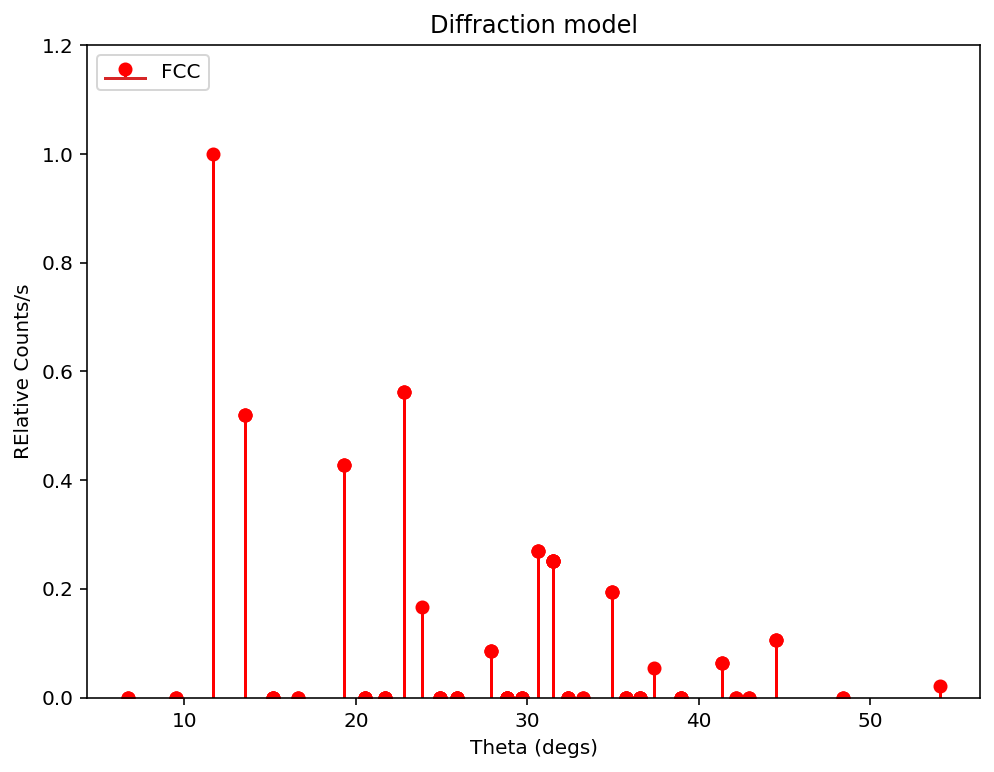

<Figure size 864x504 with 0 Axes>

In [7]:
#importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
A=1 #for single element BCC
wavelength=0.154*1e-9 #wavelength in metres
a= 0.659*1e-9 #lattice constant in metres

n=4 #number of atoms

#Defining positions of each atom
positions=np.zeros((n,3))
positions[0,:]=0,0,0
positions[1,:]=0.5,0,0.5
positions[2,:]=0.5,0.5,0
positions[3,:]=0,0.5,0.5

atoms=np.linspace(1,n,n,dtype=int)

#making a dataframe of postions
df = pd.DataFrame(positions,columns=('x','y','z'),index=atoms)


#Finding the miller indicies
indicies=[]
for h in range(0,5):
    for k in range(0,5):
        for l in range(0,5):
            new=[h,k,l]
            indicies=np.append(indicies,new).reshape(-1,3) #array of all miller indicies
indicies=np.delete(indicies,0,0) #plane (0,0,0) will mess with our results

#Finding the recioprocal space
q=((2*np.pi))*indicies #array of reciprical spaces


#Finding the structure factor for each position
aValues=[]
for x in range(0,len(q)):
    working=[]
    for y in range(0, len(positions)):
        value=(np.cos(np.dot(q[x,],positions[y,]))+(1j*np.sin(np.dot(q[x,],positions[y,]))))
        working=np.append(working,value)
    aValues=np.append(aValues,working).reshape(-1,len(positions))

#Summing the structure factors to find the total one for each plane
aFinal=np.abs(np.sum(aValues,axis=1))

#Finding the intensity 
intensity=aFinal*aFinal

#Finding the Bragg angle for each plane
angle=[]
for x in range(0,len(indicies)):
    d=np.sqrt((a**2)/((indicies[x,0]**2)+(indicies[x,1]**2)+(indicies[x,2]**2)))
    newAngle=np.arcsin(wavelength/(2*d))
    angle=np.append(angle,newAngle)

#converting to degrees
theta=np.degrees(angle)

    
#Finding the multiplicities ofr each plane
multiplicities=[]
for x in range(0,len(angle)):
    mult=np.count_nonzero(angle==angle[x])
    multiplicities=np.append(multiplicities,mult)


#finding index multiplicities
index=[]
for u in range(0,len(indicies)):
    count=np.count_nonzero(indicies[u])
    index=np.append(index,2**count)

#finding lorentz polarization factor
LP=[]
for w in range(0,len(angle)):
    value=1/(angle[w]**(5/2))
    LP=np.append(LP,value)

#Finding mornalised real intensity
I=[]
for g in range(0,len(angle)):
    number=intensity[g]*multiplicities[g]*index[g]*LP[g]
    I=np.append(I,number)
#normalising
maximum=np.amax(I)
IFinal=I/maximum

#Displaying the table
df=pd.DataFrame((indicies[:,0],indicies[:,1],indicies[:,2],aValues[:,0],aValues[:,1],aFinal,intensity,angle,theta,multiplicities,index,LP,IFinal))
df=df.transpose()
df=df.round(decimals=2)
df.columns=["$h$","$k$","$l$","$exp(iq\cdot R_{1})$","$exp(iq \cdot R_{2})$","$|A_{hkl}|$","$I_{hkl}$","$\theta_{bragg}\newline \small{(rad)}$","$\theta_{bragg}\newline \small{(deg)}$","$\theta_{multiplicity}$","$\theta_{index}$","$LP$","$I_{real}\newline \small{(normalised)}$"]
df=df.astype(dtype={"$h$":"int64","$k$":"int64","$l$":"int64","$|A_{hkl}|$":"float64","$I_{hkl}$":"float64","$\theta_{bragg}\newline \small{(rad)}$":"float64","$\theta_{bragg}\newline \small{(deg)}$":"float64","$\theta_{multiplicity}$":"int64","$\theta_{index}$":"int64","$LP$":"int64","$I_{real}\newline \small{(normalised)}$":"float64"})
display(df)

#plotting graph
xData=theta
yData=IFinal
fig=plt.figure(figsize=(8,6))
plt.title('Diffraction model')
plt.xlabel('Theta (degs)')
plt.ylabel('RElative Counts/s')
plt.stem(xData,yData, linefmt='red', bottom=-10,label='FCC')
plt.ylim(0.0,1.2)
plt.legend(loc=2)
plt.show(fig)

df.to_csv('FCC.csv')
plt.savefig('FCC Simulation.png')

## Sodium Chloride \(NaCl\)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype

$h$  $k$  $l$  $exp(iq\cdot R_{1})$  $exp(iq \cdot R_{2})$  $|A_{hkl}|$  \
0      0    0    1             17.0+0.0j             -17.0+0.0j          0.0   
1      0    0    2             17.0+0.0j              17.0-0.0j        108.0   
2      0    0    3             17.0+0.0j             -17.0+0.0j          0.0   
3      0    0    4             17.0+0.0j              17.0-0.0j        108.0   
4      0    1    0             17.0+0.0j              17.0+0.0j          0.0   
5      0    1    1             17.0+0.0j             -17.0+0.0j          0.0   
6      0    1    2             17.0+0.0j              17.0-0.0j          0.0   
7      0    1    3             17.0+0.0j             -17.0+0.0j          0.0   
8      0    1    4             17.0+0.0j              17.0-0.0j          0.0   
9      0    2    0             17.0+0.0j              17.0+0.0j        108.0   
10     0    2    1             17.0+0.0j             -17.0+0.0j          0.0   
11     0    2    2             17.0+0.0j              17.0-0.0j        108.0   
12     0    2    3             17.0+0.0j             -17.0+0.0j          0.0   
13     0    2    4             17.0+0.0j              17.0-0.0j        108.0   
14     0    3    0             17.0+0.0j              17.0+0.0j          0.0   
15     0    3    1             17.0+0.0j             -17.0+0.0j          0.0   
16     0    3    2             17.0+0.0j              17.0-0.0j          0.0   
17     0    3    3             17.0+0.0j             -17.0+0.0j          0.0   
18     0    3    4             17.0+0.0j              17.0-0.0j          0.0   
19     0    4    0             17.0+0.0j              17.0+0.0j        108.0   
20     0    4    1             17.0+0.0j             -17.0+0.0j          0.0   
21     0    4    2             17.0+0.0j              17.0-0.0j        108.0   
22     0    4    3             17.0+0.0j             -17.0+0.0j          0.0   
23     0    4    4             17.0+0.0j              17.0-0.0j        108.0   
24     1    0    0             17.0+0.0j             -17.0+0.0j          0.0   
25     1    0    1             17.0+0.0j              17.0-0.0j          0.0   
26     1    0    2             17.0+0.0j             -17.0+0.0j          0.0   
27     1    0    3             17.0+0.0j              17.0-0.0j          0.0   
28     1    0    4             17.0+0.0j             -17.0+0.0j          0.0   
29     1    1    0             17.0+0.0j             -17.0+0.0j          0.0   
30     1    1    1             17.0+0.0j              17.0-0.0j         28.0   
31     1    1    2             17.0+0.0j             -17.0+0.0j          0.0   
32     1    1    3             17.0+0.0j              17.0-0.0j         28.0   
33     1    1    4             17.0+0.0j             -17.0+0.0j          0.0   
34     1    2    0             17.0+0.0j             -17.0+0.0j          0.0   
35     1    2    1             17.0+0.0j              17.0-0.0j          0.0   
36     1    2    2             17.0+0.0j             -17.0+0.0j          0.0   
37     1    2    3             17.0+0.0j              17.0-0.0j          0.0   
38     1    2    4             17.0+0.0j             -17.0+0.0j          0.0   
39     1    3    0             17.0+0.0j             -17.0+0.0j          0.0   
40     1    3    1             17.0+0.0j              17.0-0.0j         28.0   
41     1    3    2             17.0+0.0j             -17.0+0.0j          0.0   
42     1    3    3             17.0+0.0j              17.0-0.0j         28.0   
43     1    3    4             17.0+0.0j             -17.0+0.0j          0.0   
44     1    4    0             17.0+0.0j             -17.0+0.0j          0.0   
45     1    4    1             17.0+0.0j              17.0-0.0j          0.0   
46     1    4    2             17.0+0.0j             -17.0+0.0j          0.0   
47     1    4    3             17.0+0.0j              17.0-0.0j          0.0   
48     1    4    4             17.0+0.0j             -17.0+0.0j          0.0   
49   

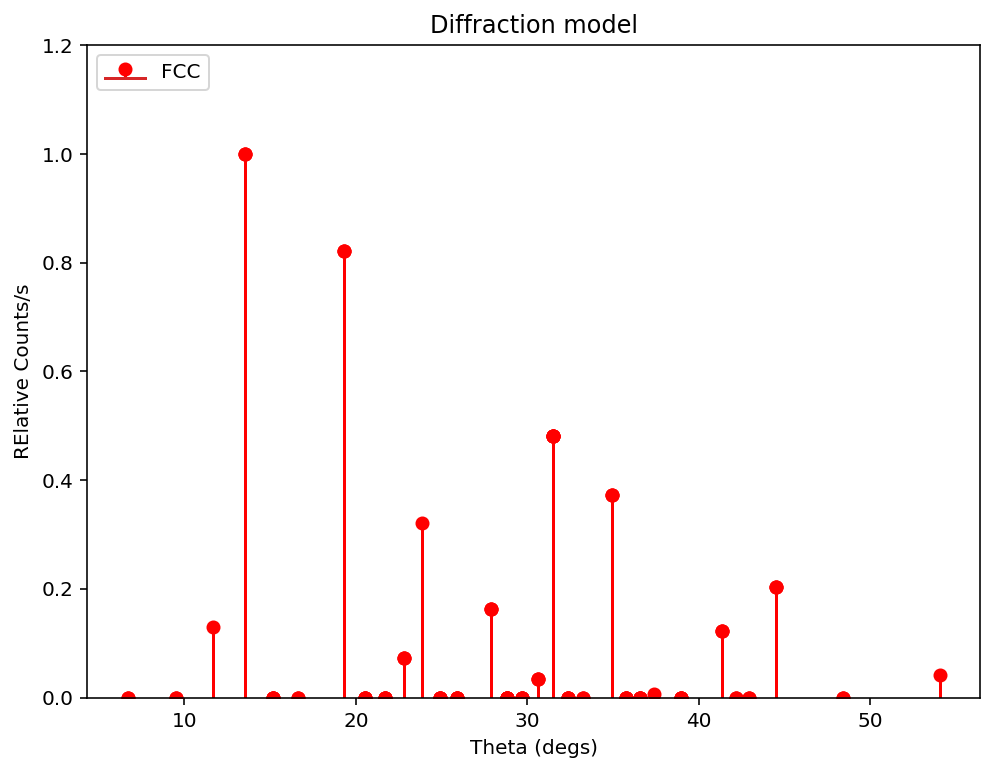

<Figure size 864x504 with 0 Axes>

In [8]:
#importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
A=[17,17,17,17,10,10,10,10]
wavelength=0.154*1e-9 #wavelength in metres
a= 0.659*1e-9 #lattice constant in metres

n=8 #number of atoms

#Defining positions of each atom
positions=np.zeros((n,3))
positions[0,:]=0,0,0
positions[1,:]=0.5,0,0.5
positions[2,:]=0.5,0.5,0
positions[3,:]=0,0.5,0.5
positions[4,:]=0.5,0,0
positions[5,:]=0,0.5,0
positions[6,:]=0,0,0.5
positions[7,:]=0.5,0.5,0.5

atoms=np.linspace(1,n,n,dtype=int)

#making a dataframe of postions
df = pd.DataFrame(positions,columns=('x','y','z'),index=atoms)


#Finding the miller indicies
indicies=[]
for h in range(0,5):
    for k in range(0,5):
        for l in range(0,5):
            new=[h,k,l]
            indicies=np.append(indicies,new).reshape(-1,3) #array of all miller indicies
indicies=np.delete(indicies,0,0) #plane (0,0,0) will mess with our results

#Finding the recioprocal space
q=((2*np.pi))*indicies #array of reciprical spaces


#Finding the structure factor for each position
aValues=[]
for x in range(0,len(q)):
    working=[]
    for y in range(0, len(positions)):
        value=(A[y]*np.cos(np.dot(q[x,],positions[y,])))+(1j*np.sin(np.dot(q[x,],positions[y,])))
        working=np.append(working,value)
    aValues=np.append(aValues,working).reshape(-1,len(positions))

#Summing the structure factors to find the total one for each plane
aFinal=np.abs(np.sum(aValues,axis=1))

#Finding the intensity 
intensity=aFinal*aFinal

#Finding the Bragg angle for each plane
angle=[]
for x in range(0,len(indicies)):
    d=np.sqrt((a**2)/((indicies[x,0]**2)+(indicies[x,1]**2)+(indicies[x,2]**2)))
    newAngle=np.arcsin(wavelength/(2*d))
    angle=np.append(angle,newAngle)

#converting to degrees
theta=np.degrees(angle)

    
#Finding the multiplicities ofr each plane
multiplicities=[]
for x in range(0,len(angle)):
    mult=np.count_nonzero(angle==angle[x])
    multiplicities=np.append(multiplicities,mult)


#finding index multiplicities
index=[]
for u in range(0,len(indicies)):
    count=np.count_nonzero(indicies[u])
    index=np.append(index,2**count)

#finding lorentz polarization factor
LP=[]
for w in range(0,len(angle)):
    value=1/(angle[w]**(5/2))
    LP=np.append(LP,value)

#Finding mornalised real intensity
I=[]
for g in range(0,len(angle)):
    number=intensity[g]*multiplicities[g]*index[g]*LP[g]
    I=np.append(I,number)
#normalising
maximum=np.amax(I)
IFinal=I/maximum

#Displaying the table
df=pd.DataFrame((indicies[:,0],indicies[:,1],indicies[:,2],aValues[:,0],aValues[:,1],aFinal,intensity,angle,theta,multiplicities,index,LP,IFinal))
df=df.transpose()
df=df.round(decimals=2)
df.columns=["$h$","$k$","$l$","$exp(iq\cdot R_{1})$","$exp(iq \cdot R_{2})$","$|A_{hkl}|$","$I_{hkl}$","$\theta_{bragg}\newline \small{(rad)}$","$\theta_{bragg}\newline \small{(deg)}$","$\theta_{multiplicity}$","$\theta_{index}$","$LP$","$I_{real}\newline \small{(normalised)}$"]
df=df.astype(dtype={"$h$":"int64","$k$":"int64","$l$":"int64","$|A_{hkl}|$":"float64","$I_{hkl}$":"float64","$\theta_{bragg}\newline \small{(rad)}$":"float64","$\theta_{bragg}\newline \small{(deg)}$":"float64","$\theta_{multiplicity}$":"int64","$\theta_{index}$":"int64","$LP$":"int64","$I_{real}\newline \small{(normalised)}$":"float64"})
display(df)

#plotting graph
xData=theta
yData=IFinal
fig=plt.figure(figsize=(8,6))
plt.title('Diffraction model')
plt.xlabel('Theta (degs)')
plt.ylabel('RElative Counts/s')
plt.stem(xData,yData, linefmt='red', bottom=-10,label='FCC')
plt.ylim(0.0,1.2)
plt.legend(loc=2)
plt.show(fig)

df.to_csv('NaCl.csv')
plt.savefig('NaCl Simulation.png')

## Potassium Chloride \(KCl\)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype

$h$  $k$  $l$  $exp(iq\cdot R_{1})$  $exp(iq \cdot R_{2})$  $|A_{hkl}|$  \
0      0    0    1             17.0+0.0j             -17.0+0.0j          0.0   
1      0    0    2             17.0+0.0j              17.0-0.0j        108.0   
2      0    0    3             17.0+0.0j             -17.0+0.0j          0.0   
3      0    0    4             17.0+0.0j              17.0-0.0j        108.0   
4      0    1    0             17.0+0.0j              17.0+0.0j          0.0   
5      0    1    1             17.0+0.0j             -17.0+0.0j          0.0   
6      0    1    2             17.0+0.0j              17.0-0.0j          0.0   
7      0    1    3             17.0+0.0j             -17.0+0.0j          0.0   
8      0    1    4             17.0+0.0j              17.0-0.0j          0.0   
9      0    2    0             17.0+0.0j              17.0+0.0j        108.0   
10     0    2    1             17.0+0.0j             -17.0+0.0j          0.0   
11     0    2    2             17.0+0.0j              17.0-0.0j        108.0   
12     0    2    3             17.0+0.0j             -17.0+0.0j          0.0   
13     0    2    4             17.0+0.0j              17.0-0.0j        108.0   
14     0    3    0             17.0+0.0j              17.0+0.0j          0.0   
15     0    3    1             17.0+0.0j             -17.0+0.0j          0.0   
16     0    3    2             17.0+0.0j              17.0-0.0j          0.0   
17     0    3    3             17.0+0.0j             -17.0+0.0j          0.0   
18     0    3    4             17.0+0.0j              17.0-0.0j          0.0   
19     0    4    0             17.0+0.0j              17.0+0.0j        108.0   
20     0    4    1             17.0+0.0j             -17.0+0.0j          0.0   
21     0    4    2             17.0+0.0j              17.0-0.0j        108.0   
22     0    4    3             17.0+0.0j             -17.0+0.0j          0.0   
23     0    4    4             17.0+0.0j              17.0-0.0j        108.0   
24     1    0    0             17.0+0.0j             -17.0+0.0j          0.0   
25     1    0    1             17.0+0.0j              17.0-0.0j          0.0   
26     1    0    2             17.0+0.0j             -17.0+0.0j          0.0   
27     1    0    3             17.0+0.0j              17.0-0.0j          0.0   
28     1    0    4             17.0+0.0j             -17.0+0.0j          0.0   
29     1    1    0             17.0+0.0j             -17.0+0.0j          0.0   
30     1    1    1             17.0+0.0j              17.0-0.0j         28.0   
31     1    1    2             17.0+0.0j             -17.0+0.0j          0.0   
32     1    1    3             17.0+0.0j              17.0-0.0j         28.0   
33     1    1    4             17.0+0.0j             -17.0+0.0j          0.0   
34     1    2    0             17.0+0.0j             -17.0+0.0j          0.0   
35     1    2    1             17.0+0.0j              17.0-0.0j          0.0   
36     1    2    2             17.0+0.0j             -17.0+0.0j          0.0   
37     1    2    3             17.0+0.0j              17.0-0.0j          0.0   
38     1    2    4             17.0+0.0j             -17.0+0.0j          0.0   
39     1    3    0             17.0+0.0j             -17.0+0.0j          0.0   
40     1    3    1             17.0+0.0j              17.0-0.0j         28.0   
41     1    3    2             17.0+0.0j             -17.0+0.0j          0.0   
42     1    3    3             17.0+0.0j              17.0-0.0j         28.0   
43     1    3    4             17.0+0.0j             -17.0+0.0j          0.0   
44     1    4    0             17.0+0.0j             -17.0+0.0j          0.0   
45     1    4    1             17.0+0.0j              17.0-0.0j          0.0   
46     1    4    2             17.0+0.0j             -17.0+0.0j          0.0   
47     1    4    3             17.0+0.0j              17.0-0.0j          0.0   
48     1    4    4             17.0+0.0j             -17.0+0.0j          0.0   
49   

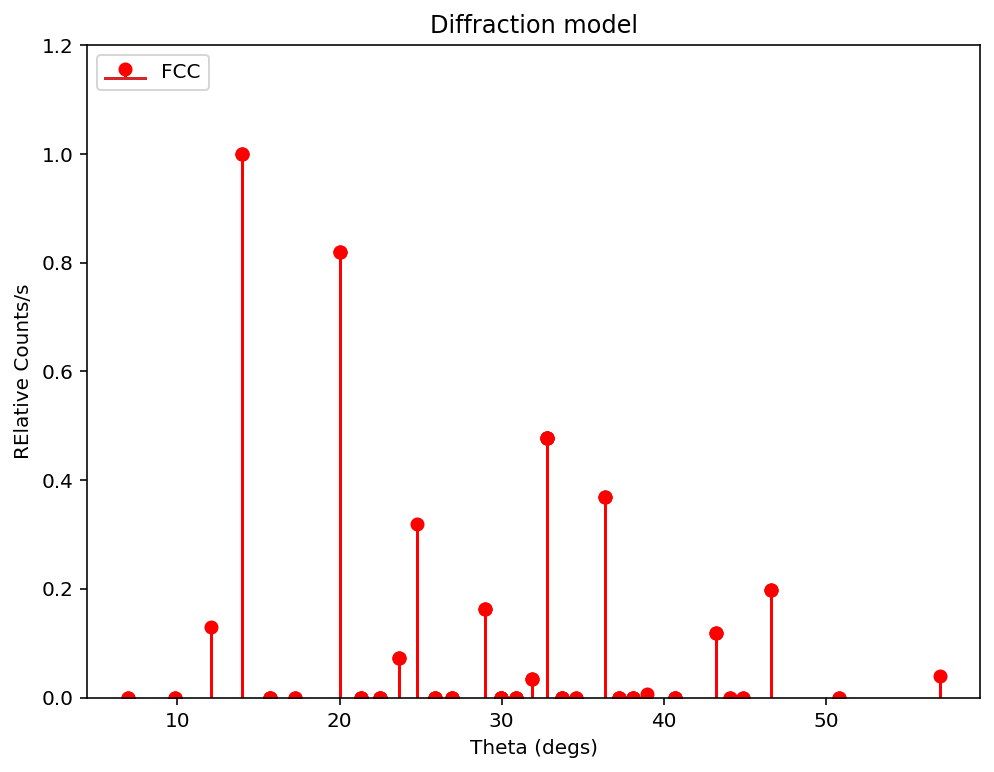

<Figure size 864x504 with 0 Axes>

In [9]:
#importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
A=[17,17,17,17,10,10,10,10]
wavelength=0.154*1e-9 #wavelength in metres
a= 0.636*1e-9 #lattice constant in metres

n=8 #number of atoms

#Defining positions of each atom
positions=np.zeros((n,3))
positions[0,:]=0,0,0
positions[1,:]=0.5,0,0.5
positions[2,:]=0.5,0.5,0
positions[3,:]=0,0.5,0.5
positions[4,:]=0.5,0,0
positions[5,:]=0,0.5,0
positions[6,:]=0,0,0.5
positions[7,:]=0.5,0.5,0.5

atoms=np.linspace(1,n,n,dtype=int)

#making a dataframe of postions
df = pd.DataFrame(positions,columns=('x','y','z'),index=atoms)


#Finding the miller indicies
indicies=[]
for h in range(0,5):
    for k in range(0,5):
        for l in range(0,5):
            new=[h,k,l]
            indicies=np.append(indicies,new).reshape(-1,3) #array of all miller indicies
indicies=np.delete(indicies,0,0) #plane (0,0,0) will mess with our results

#Finding the recioprocal space
q=((2*np.pi))*indicies #array of reciprical spaces


#Finding the structure factor for each position
aValues=[]
for x in range(0,len(q)):
    working=[]
    for y in range(0, len(positions)):
        value=(A[y]*np.cos(np.dot(q[x,],positions[y,])))+(1j*np.sin(np.dot(q[x,],positions[y,])))
        working=np.append(working,value)
    aValues=np.append(aValues,working).reshape(-1,len(positions))

#Summing the structure factors to find the total one for each plane
aFinal=np.abs(np.sum(aValues,axis=1))

#Finding the intensity 
intensity=aFinal*aFinal

#Finding the Bragg angle for each plane
angle=[]
for x in range(0,len(indicies)):
    d=np.sqrt((a**2)/((indicies[x,0]**2)+(indicies[x,1]**2)+(indicies[x,2]**2)))
    newAngle=np.arcsin(wavelength/(2*d))
    angle=np.append(angle,newAngle)

#converting to degrees
theta=np.degrees(angle)

    
#Finding the multiplicities ofr each plane
multiplicities=[]
for x in range(0,len(angle)):
    mult=np.count_nonzero(angle==angle[x])
    multiplicities=np.append(multiplicities,mult)


#finding index multiplicities
index=[]
for u in range(0,len(indicies)):
    count=np.count_nonzero(indicies[u])
    index=np.append(index,2**count)

#finding lorentz polarization factor
LP=[]
for w in range(0,len(angle)):
    value=1/(angle[w]**(5/2))
    LP=np.append(LP,value)

#Finding mornalised real intensity
I=[]
for g in range(0,len(angle)):
    number=intensity[g]*multiplicities[g]*index[g]*LP[g]
    I=np.append(I,number)
#normalising
maximum=np.amax(I)
IFinal=I/maximum

#Displaying the table
df=pd.DataFrame((indicies[:,0],indicies[:,1],indicies[:,2],aValues[:,0],aValues[:,1],aFinal,intensity,angle,theta,multiplicities,index,LP,IFinal))
df=df.transpose()
df=df.round(decimals=2)
df.columns=["$h$","$k$","$l$","$exp(iq\cdot R_{1})$","$exp(iq \cdot R_{2})$","$|A_{hkl}|$","$I_{hkl}$","$\theta_{bragg}\newline \small{(rad)}$","$\theta_{bragg}\newline \small{(deg)}$","$\theta_{multiplicity}$","$\theta_{index}$","$LP$","$I_{real}\newline \small{(normalised)}$"]
df=df.astype(dtype={"$h$":"int64","$k$":"int64","$l$":"int64","$|A_{hkl}|$":"float64","$I_{hkl}$":"float64","$\theta_{bragg}\newline \small{(rad)}$":"float64","$\theta_{bragg}\newline \small{(deg)}$":"float64","$\theta_{multiplicity}$":"int64","$\theta_{index}$":"int64","$LP$":"int64","$I_{real}\newline \small{(normalised)}$":"float64"})
display(df)

#plotting graph
xData=theta
yData=IFinal
fig=plt.figure(figsize=(8,6))
plt.title('Diffraction model')
plt.xlabel('Theta (degs)')
plt.ylabel('RElative Counts/s')
plt.stem(xData,yData, linefmt='red', bottom=-10,label='FCC')
plt.ylim(0.0,1.2)
plt.legend(loc=2)
plt.show(fig)

df.to_csv('KCl.csv')
plt.savefig('KCl Simulation.png')

# **Powder X\-ray Diffraction Theory**



Fitted parameters m: 51.96, c: 0.01
Parameter errors: m: 0.00, c: 0.00
ChiSq = 6.71e+08, ChiSq/NDF = 134159758.11.


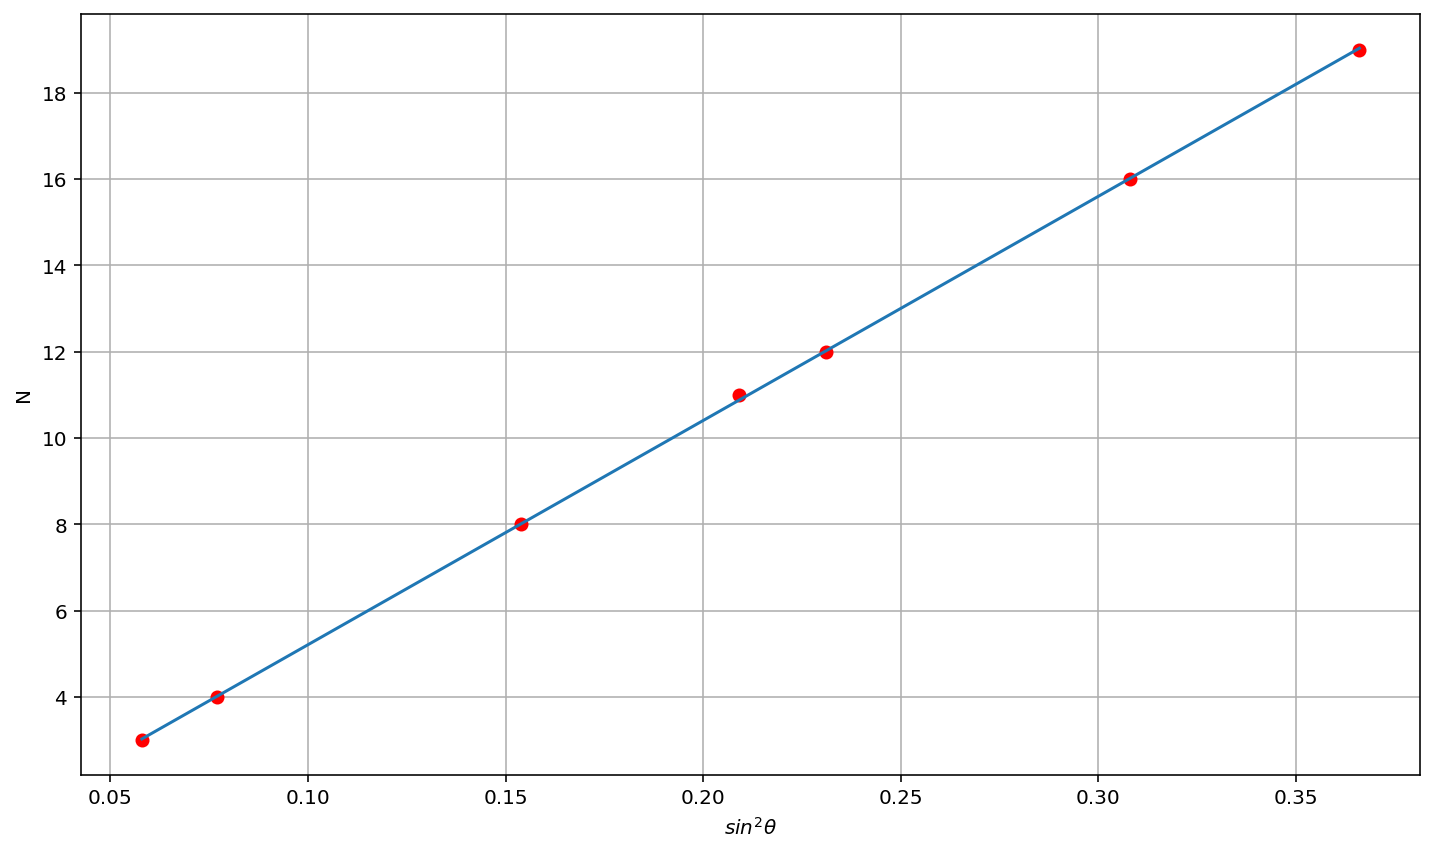

LATTICE CONSTANT: 5.550649857410237e-10
ERROR: 1.0141503291617461e-16


In [10]:
modelData=np.loadtxt('model data.csv',delimiter=',')
xdata=modelData[:,0]
ydata=modelData[:,1]
xerr=0.0000001
yerr=0.000001
initParams=([60,2])

pInit = initParams
nPoints = len(xdata)
nPars = len(initParams)
# Run fit
output = least_squares(calcChiSq, pInit, args = (xdata, ydata, xerr, yerr))
# Get least_squares output, stored in array output.x[]
grad = output.x[0]
intercept = output.x[1]
# Get errors from our fits using fitStdError(), defined above
pErrors = fitStdError(output.jac)
d_A = pErrors[0]
d_b = pErrors[1]
# Calculate fitted y-values using our fit parameters and the original fit function
xPlot = np.linspace(np.min(xdata), np.max(xdata), 300)
fitData = fitFunc(output.x, xPlot)
# Output fit parameters
print("Fitted parameters m: {0:.2f}, c: {1:.2f}".format(grad, intercept))
print("Parameter errors: m: {0:.2f}, c: {1:.2f}".format(d_A, d_b))
# Calculate chis**2 per point, summed chi**2 and chi**2/NDF
chiarr = calcChiSq(output.x, xdata, ydata, xerr, yerr)**2
chisq = np.sum(chiarr)
NDF = nPoints - nPars
chisqndf = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))

plt.plot(xdata,ydata,linestyle="",marker="o",color="red")
plt.plot(xdata,((grad*xdata)+intercept))
plt.grid()
plt.xlabel(r'$sin^2\theta$')
plt.ylabel('N')
plt.show()

latticeSquared=(grad*(((0.154*1e-9)**2)))/4
lattice1=np.sqrt(latticeSquared)
latticeError1=lattice1*0.5*(((d_A*(((0.154*1e-9)**2)))/4)/latticeSquared)
print("LATTICE CONSTANT:",lattice1)
print("ERROR:",latticeError1)



# **Data Analysis**



Fitted parameters m: 64.82, c: 0.00
Parameter errors: m: 1.03, c: 0.07
ChiSq = 2.62e+00, ChiSq/NDF =  0.87.


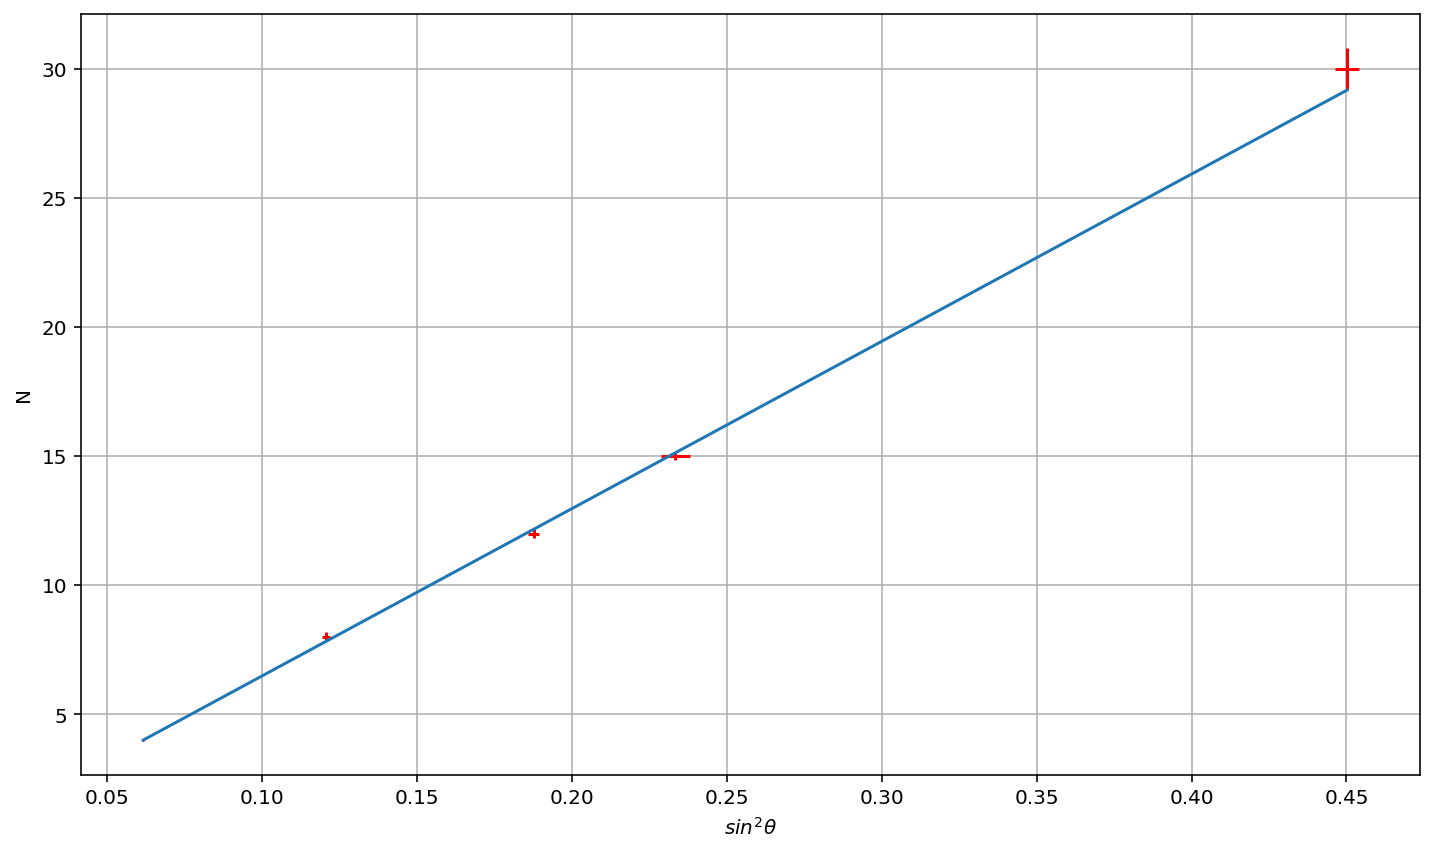

LATTICE CONSTANT: 6.199366163580722e-10
ERROR: 4.9351382090166484e-12


In [11]:
#FOR SAMPLE 1

data=np.loadtxt('Sample1Final.csv',delimiter=',')
sin2=data[:,0]
sin2Error=data[:,1]
N=data[:,2]
nError=data[:,3]

initParams=([60,4])
xdata=sin2
xerror=sin2Error
ydata=N
yerror=nError

pInit = initParams
nPoints = len(xdata)
nPars = len(initParams)
# Run fit
output = least_squares(calcChiSq, pInit, args = (xdata, ydata, xerror, yerror))
# Get least_squares output, stored in array output.x[]
grad = output.x[0]
intercept = output.x[1]
# Get errors from our fits using fitStdError(), defined above
pErrors = fitStdError(output.jac)
d_A = pErrors[0]
d_b = pErrors[1]
# Calculate fitted y-values using our fit parameters and the original fit function
xPlot = np.linspace(np.min(xdata), np.max(xdata), 300)
fitData = fitFunc(output.x, xPlot)
# Output fit parameters
print("Fitted parameters m: {0:.2f}, c: {1:.2f}".format(grad, intercept))
print("Parameter errors: m: {0:.2f}, c: {1:.2f}".format(d_A, d_b))
# Calculate chis**2 per point, summed chi**2 and chi**2/NDF
chiarr = calcChiSq(output.x, xdata, ydata, xerror, yerror)**2
chisq = np.sum(chiarr)
NDF = nPoints - nPars
chisqndf = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))


plt.errorbar(sin2,N,xerr=sin2Error,yerr=nError,linestyle="",color="red")
plt.plot(sin2,((grad*sin2)+intercept))
plt.grid()
plt.xlabel(r'$sin^2\theta$')
plt.ylabel('N')
plt.show()

latticeSquared=(grad*(((0.154*1e-9)**2)))/4
lattice1=np.sqrt(latticeSquared)
latticeError1=lattice1*0.5*(((d_A*(((0.154*1e-9)**2)))/4)/latticeSquared)
print("LATTICE CONSTANT:",lattice1)
print("ERROR:",latticeError1)

Fitted parameters m: 54.07, c: -0.00
Parameter errors: m: 0.37, c: 0.04
ChiSq = 2.80e+00, ChiSq/NDF =  0.93.


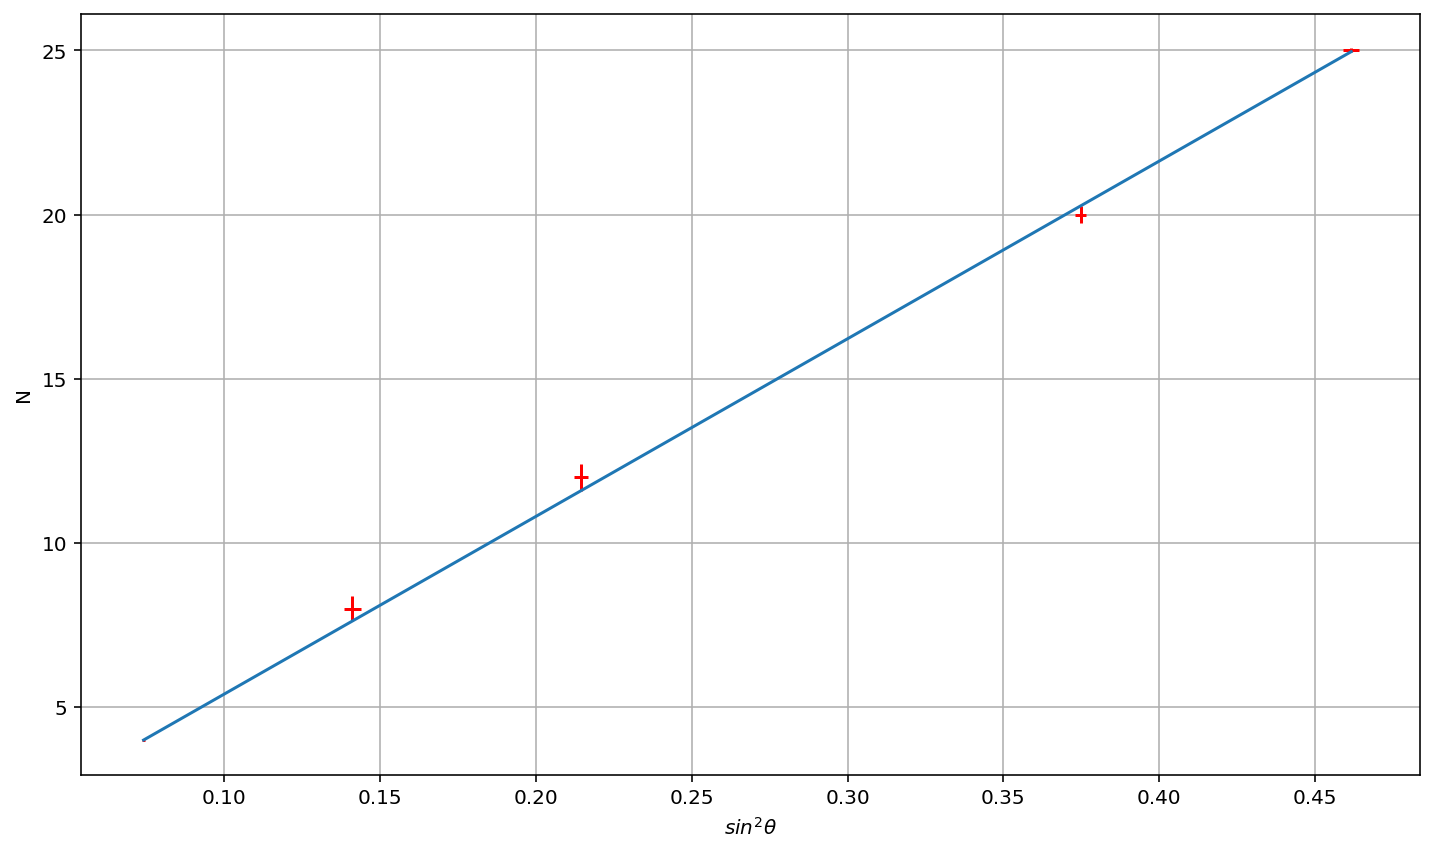

LATTICE CONSTANT: 5.661855977052212e-10
ERROR: 1.9266510016627274e-12


In [12]:
#FOR SAMPLE 2

data=np.loadtxt('Sample2Final.csv',delimiter=',')
sin2=data[:,0]
sin2Error=data[:,1]
N=data[:,2]
nError=data[:,3]

initParams=([60,4])
xdata=sin2
xerror=sin2Error
ydata=N
yerror=nError

pInit = initParams
nPoints = len(xdata)
nPars = len(initParams)
# Run fit
output = least_squares(calcChiSq, pInit, args = (xdata, ydata, xerror, yerror))
# Get least_squares output, stored in array output.x[]
grad = output.x[0]
intercept = output.x[1]
# Get errors from our fits using fitStdError(), defined above
pErrors = fitStdError(output.jac)
d_A = pErrors[0]
d_b = pErrors[1]
# Calculate fitted y-values using our fit parameters and the original fit function
xPlot = np.linspace(np.min(xdata), np.max(xdata), 300)
fitData = fitFunc(output.x, xPlot)
# Output fit parameters
print("Fitted parameters m: {0:.2f}, c: {1:.2f}".format(grad, intercept))
print("Parameter errors: m: {0:.2f}, c: {1:.2f}".format(d_A, d_b))
# Calculate chis**2 per point, summed chi**2 and chi**2/NDF
chiarr = calcChiSq(output.x, xdata, ydata, xerror, yerror)**2
chisq = np.sum(chiarr)
NDF = nPoints - nPars
chisqndf = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))


plt.errorbar(sin2,N,xerr=sin2Error,yerr=nError,linestyle="",color="red")
plt.plot(sin2,((grad*sin2)+intercept))
plt.grid()
plt.xlabel(r'$sin^2\theta$')
plt.ylabel('N')
plt.show()

latticeSquared=(grad*(((0.154*1e-9)**2)))/4
lattice2=np.sqrt(latticeSquared)
latticeError2=lattice2*0.5*(((d_A*(((0.154*1e-9)**2)))/4)/latticeSquared)
print("LATTICE CONSTANT:",lattice2)
print("ERROR:",latticeError2)

# Comparing Data to Expected Results



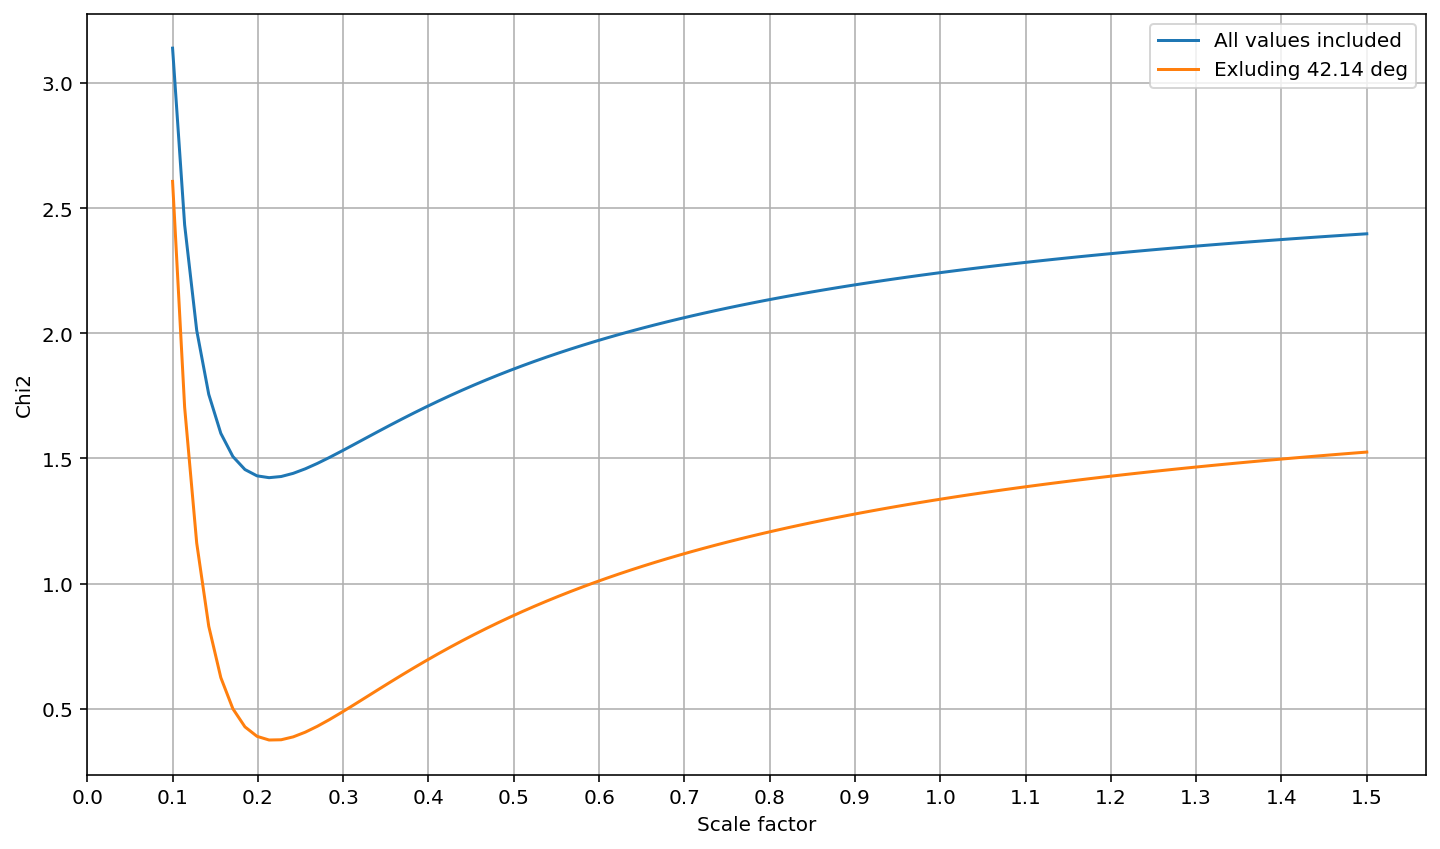

[0.37504768]
[0.21313131]


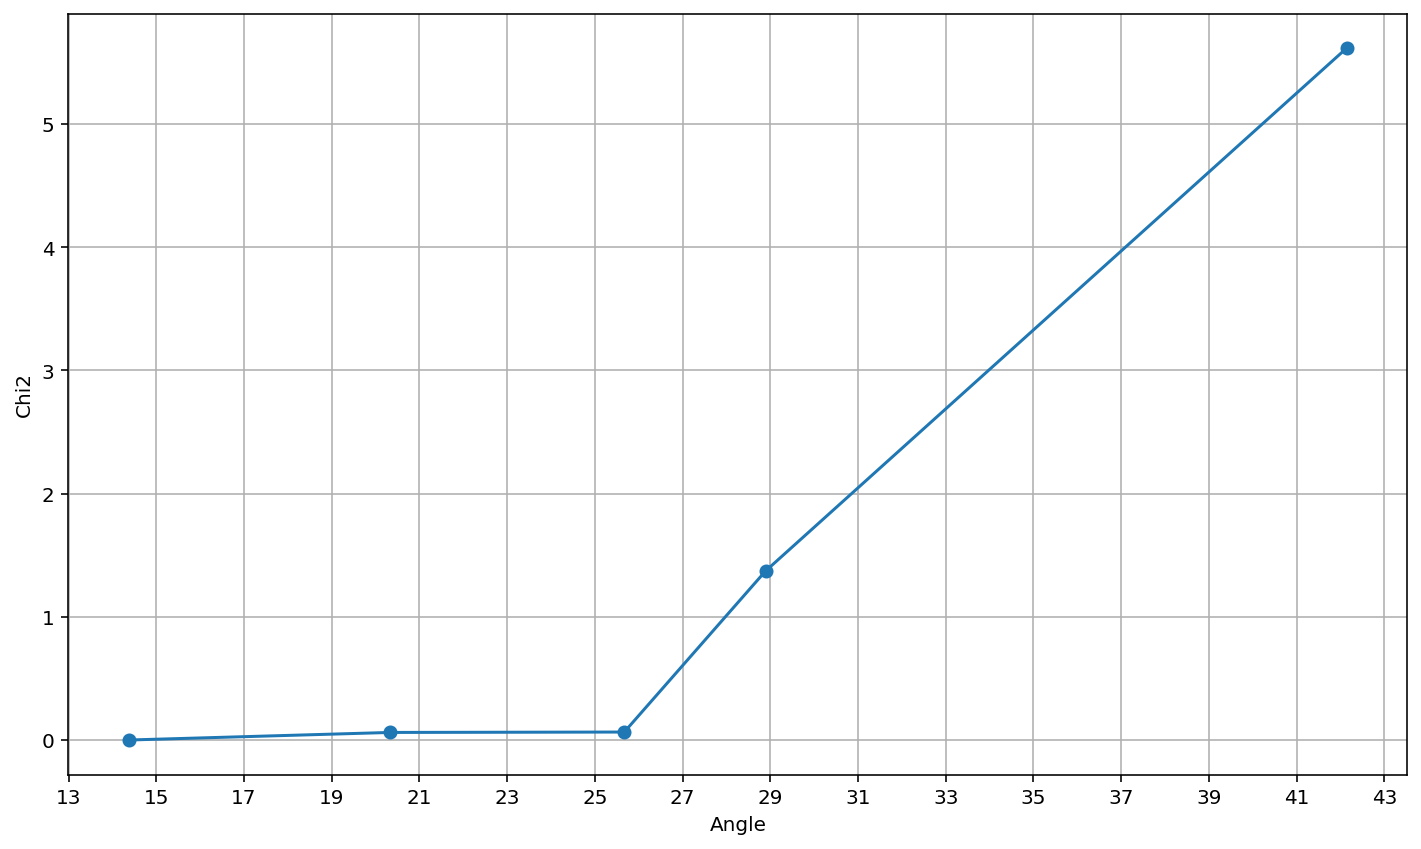

In [13]:
from scipy.integrate import quad
def integrand(x, A, x0,w,c):
    return A*np.exp(0.5*((x-x)**2)/(w**2))+c

gaussian=np.loadtxt('gaussianData.csv',delimiter=',')
A=gaussian[:,2]
x0=gaussian[:,3]
w=gaussian[:,4]
areas=A*w

simulated=np.array([1,0.819,0.072,0.163,0.12])
aErr=np.array([1.32,1.65,1.54,1.52,3.08])
wErr=np.array([0.07,0.28,0.12,0.98,1.70])

scalefactor=np.linspace(0.1,1.5,100)

chiPlot1=[]
for i in range(0,(len(scalefactor))):
    xVal=areas*scalefactor[i]
    xerr=(xVal*np.sqrt((aErr*aErr)+(wErr*wErr)))*scalefactor[i]
    chiarr=((xVal-simulated)**2)/xerr
    chisq = np.sum(chiarr)
    NDF = 5
    chisqndf = chisq/NDF
    chiPlot1=np.append(chiPlot1,chisqndf)
    #print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))


A2=gaussian[0:4,2]
w2=gaussian[0:4,4]
areas2=A2*w2
simulated2=np.array([1,0.819,0.072,0.163])
aErr2=np.array([1.32,1.65,1.54,1.52])
wErr2=np.array([0.07,0.28,0.12,0.98])

chiPlot2=[]
for k in range(0,(len(scalefactor))):
    xVal2=areas2*scalefactor[k]
    xerr2=(xVal2*np.sqrt((aErr2*aErr2)+(wErr2*wErr2)))*scalefactor[k]
    chiarr2=((xVal2-simulated2)**2)/xerr2
    chisq2 = np.sum(chiarr2)
    NDF = 4
    chisqndf2 = chisq2/NDF
    chiPlot2=np.append(chiPlot2,chisqndf2)
    #print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))
    
plt.plot(scalefactor,chiPlot1,label="All values included")
plt.plot(scalefactor,chiPlot2,label="Exluding 42.14 deg")
plt.xlabel('Scale factor')
plt.ylabel('Chi2')
plt.legend()
plt.xticks(np.arange(0,1.6,step=0.1))
plt.grid()
plt.show()

#finding scalefactor where chi2 is minimum
minimum=scalefactor[(np.where(chiPlot1==np.min(chiPlot1)))]

print(chiPlot2[np.where(chiPlot2==np.min(chiPlot2))])
print(scalefactor[np.where(chiPlot2==np.min(chiPlot2))])
xVal=areas*minimum
xerr=(xVal*np.sqrt((aErr*aErr)+(wErr*wErr)))*minimum
chiarr=((xVal-simulated)**2)/xerr

plt.plot(x0,chiarr,marker='o')
plt.xticks(np.arange(13,45,step=2))
plt.grid()
plt.xlabel('Angle')
plt.ylabel('Chi2')
plt.show()

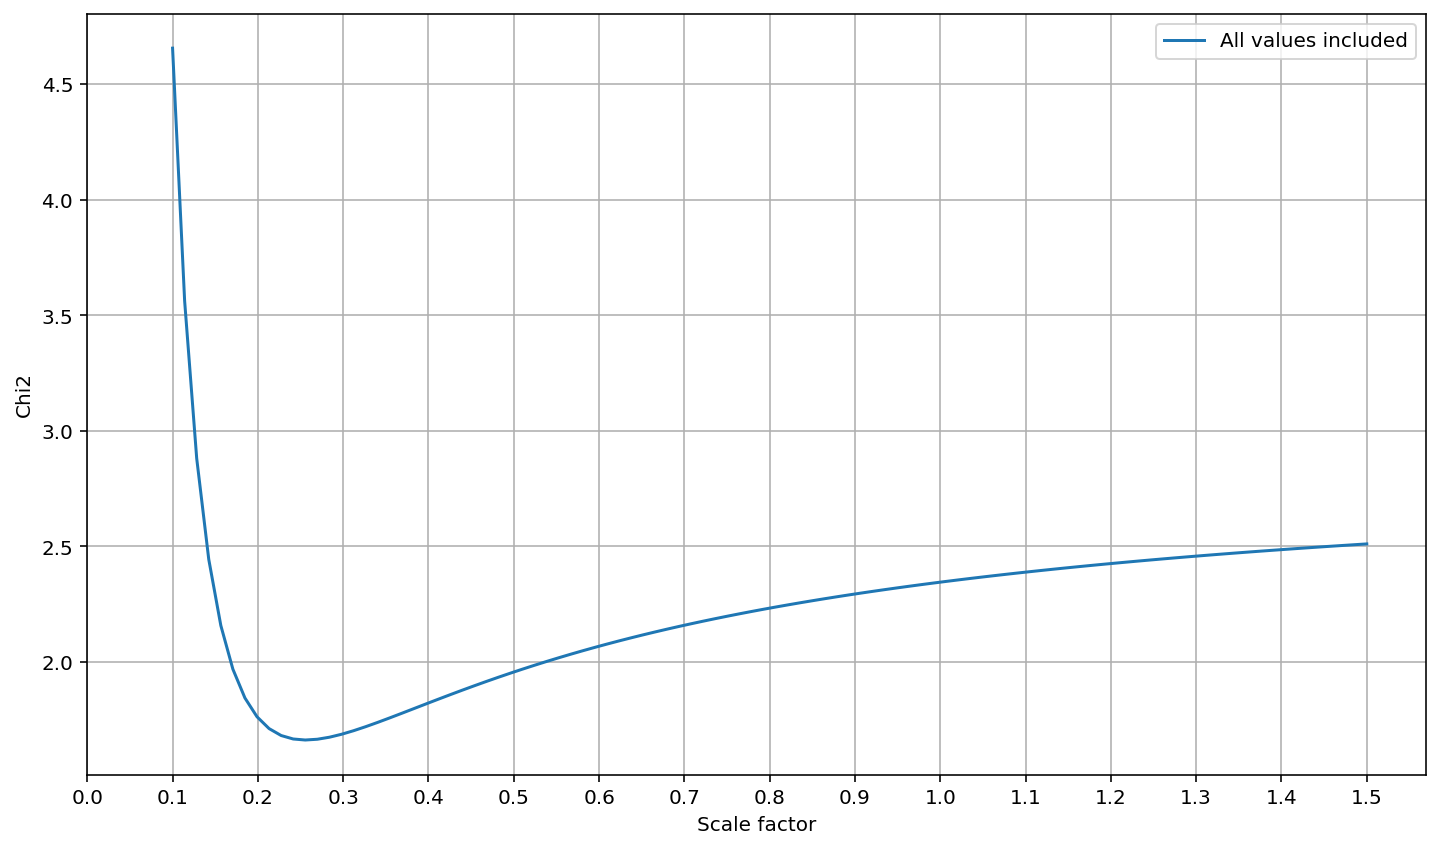

[1.66307408]
[0.25555556]


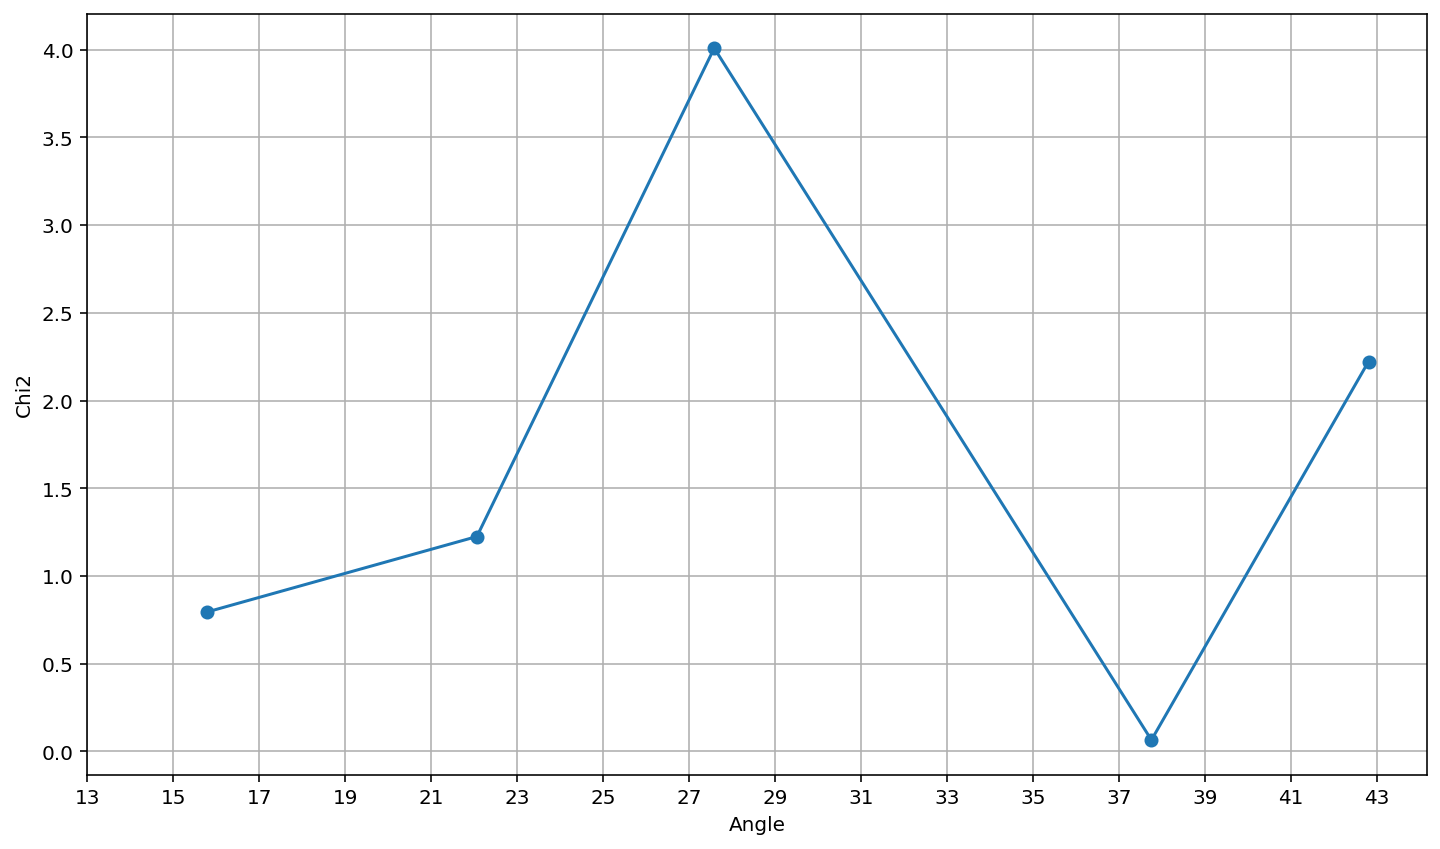

In [14]:
#FOR SAMPLE 2

from scipy.integrate import quad
def integrand(x, A, x0,w,c):
    return A*np.exp(0.5*((x-x)**2)/(w**2))+c

gaussian=np.loadtxt('gaussianData2.csv',delimiter=',')
A=gaussian[:,2]
x0=gaussian[:,3]
w=gaussian[:,4]
areas=A*w

simulated=np.array([1,0.82,0.32,0.16,0.12])
aErr=np.array([1.32,1.65,1.54,1.52,3.08])
wErr=np.array([0.07,0.28,0.12,0.98,1.70])

scalefactor=np.linspace(0.1,1.5,100)

chiPlot1=[]
for i in range(0,(len(scalefactor))):
    xVal=areas*scalefactor[i]
    xerr=(xVal*np.sqrt((aErr*aErr)+(wErr*wErr)))*scalefactor[i]
    chiarr=((xVal-simulated)**2)/xerr
    chisq = np.sum(chiarr)
    NDF = 5
    chisqndf = chisq/NDF
    chiPlot1=np.append(chiPlot1,chisqndf)
    #print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))


plt.plot(scalefactor,chiPlot1,label="All values included")
#plt.plot(scalefactor,chiPlot2,label="Exluding 42.14 deg")
plt.xlabel('Scale factor')
plt.ylabel('Chi2')
plt.legend()
plt.xticks(np.arange(0,1.6,step=0.1))
plt.grid()
plt.show()

print(chiPlot1[np.where(chiPlot1==np.min(chiPlot1))])
print(scalefactor[np.where(chiPlot1==np.min(chiPlot1))])

#finding scalefactor where chi2 is minimum
minimum=scalefactor[(np.where(chiPlot1==np.min(chiPlot1)))]
xVal=areas*minimum
xerr=(xVal*np.sqrt((aErr*aErr)+(wErr*wErr)))*minimum
chiarr=((xVal-simulated)**2)/xerr

plt.plot(x0,chiarr,marker='o')
plt.xticks(np.arange(13,45,step=2))
plt.grid()
plt.xlabel('Angle')
plt.ylabel('Chi2')
plt.show()

# Estimating Crystal Size



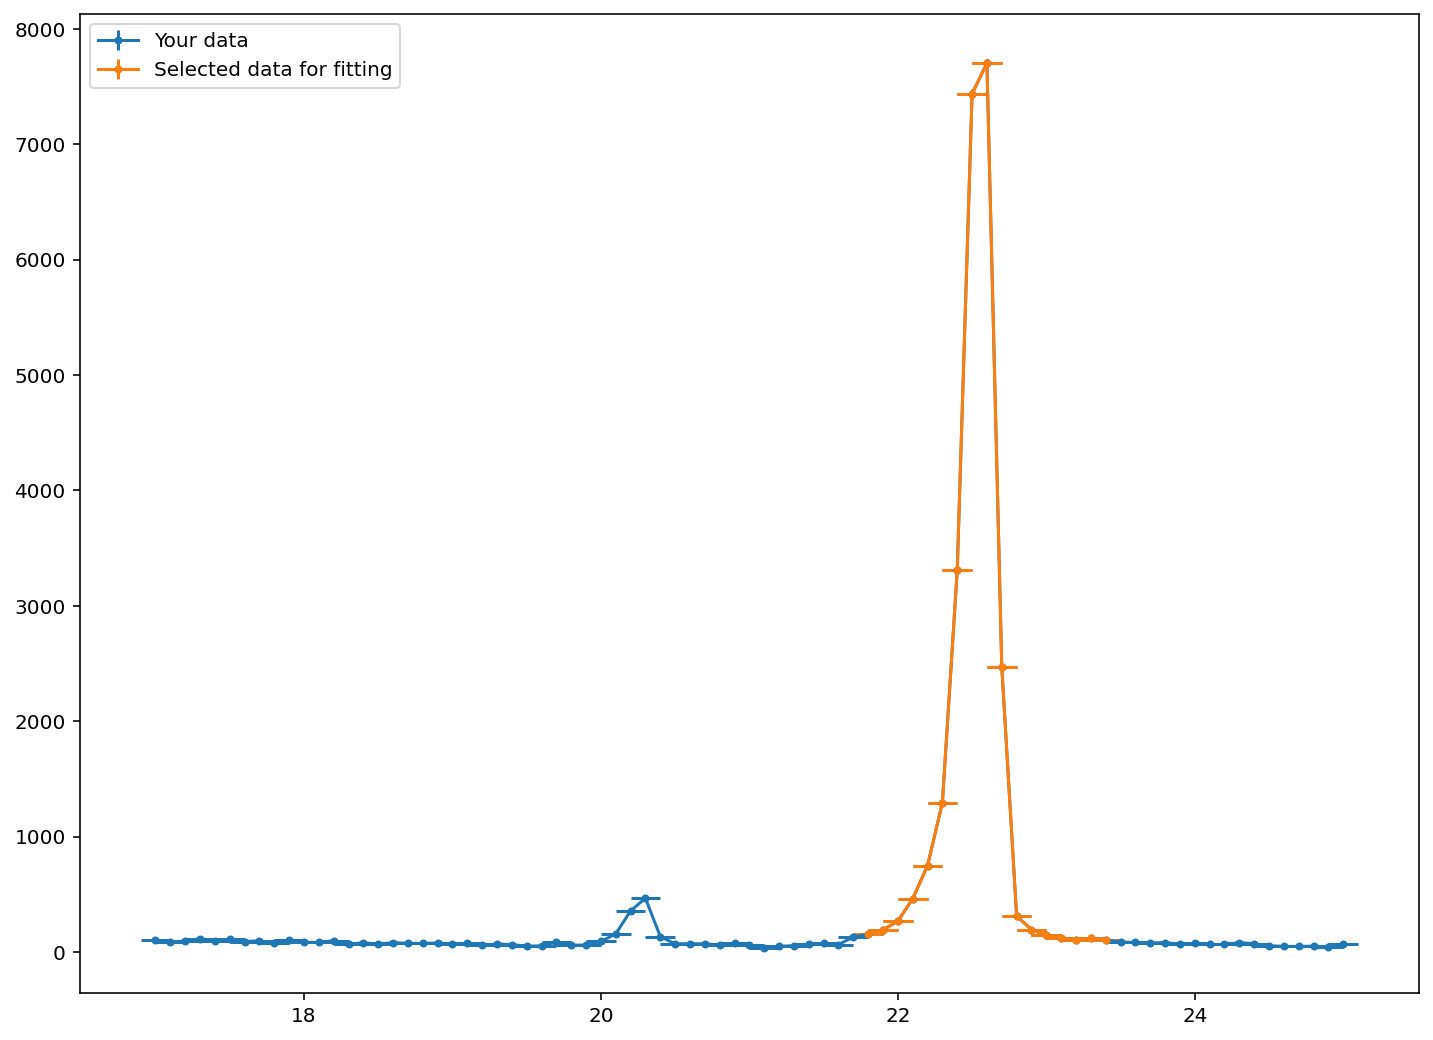

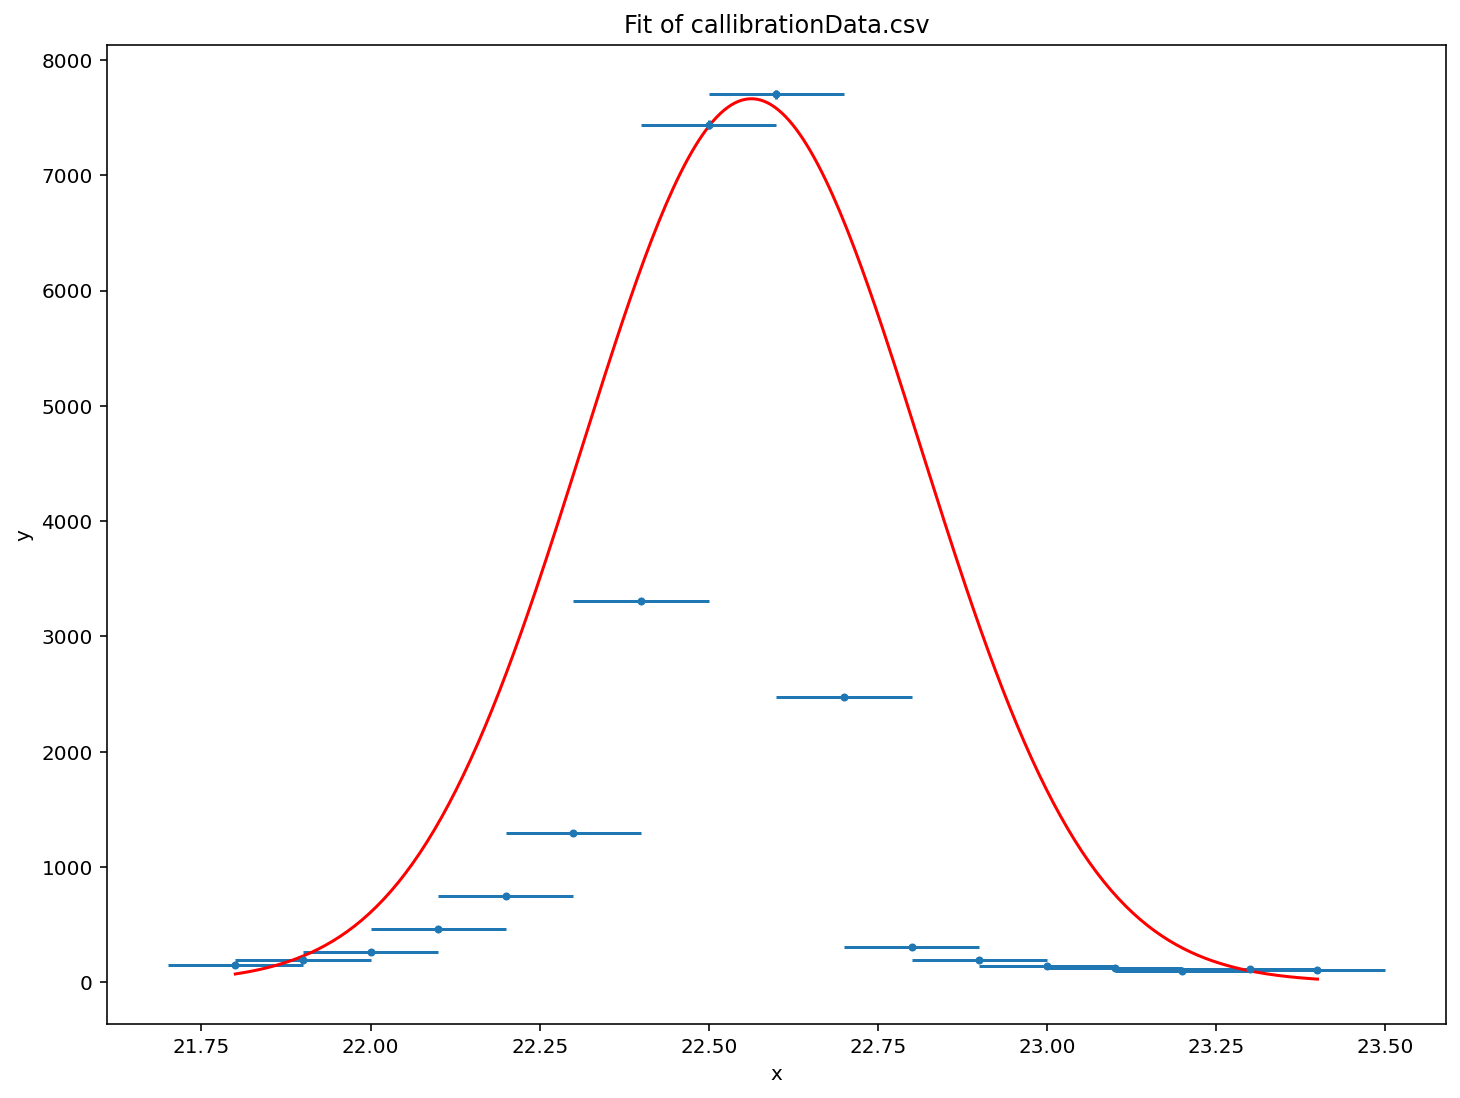

Fitted parameters: A= 7662.77, x0= 22.56, w= 0.25, c= 0.10
Parameter errors: A= 397.38, x0= 0.02, w= 0.02, c= 108.53
ChiSq = 3.44e+01, ChiSq/NDF =  2.65.


In [15]:
#fitting the callibration data
startX = 21.7
stopX = 23.5

A = 8000. #amplitude
x0 = 22.5  #centre x position
w = 0.15  #width
c = 0.01  #y intercept

xErr = 0.1

Dwell = 5

filename = "callibrationData.csv"

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares, curve_fit



impX,impY = np.loadtxt("./"+filename, delimiter = ',', unpack=True) 

fitRange = np.array([startX,stopX])

initParams = np.array([A,x0,w,c])



impEX = xErr*np.ones(len(impX))
impEY = np.sqrt(impY/Dwell)

boolArray = (impX> fitRange[0]) & (impX< fitRange[1])

xdata = impX[boolArray]
ydata = impY[boolArray]

xerror = impEX[boolArray]
yerror = impEY[boolArray]


fig = plt.figure(figsize = (12, 9))
plt.errorbar(impX,impY, impEY, impEX, marker='.', linestyle='-', label='Your data')
plt.errorbar(xdata, ydata, yerror,xerror, marker='.', linestyle='-', label='Selected data for fitting')
plt.legend(loc = 2)
plt.show()

def fitFunc(p, x):
    '''
    Fit function
    '''
    f= p[0]*np.exp(-(1/2)*((x-p[1])/p[2])**2)+p[3]

    return f

def fitFuncDiff(p, x):
    '''
    Differential of fit function
    '''
    df= -p[0]*np.exp(-(1/2)*((x-p[1])/p[2])**2)*((x-p[1])/(p[2]**2))
    return df

def calcChiSq(p, x, y, xerr, yerr):
    '''
    Error function for fit
    '''
    e = (y - fitFunc(p, x))/(np.sqrt(yerr**2 + fitFuncDiff(p, x)**2*xerr**2))
    return e



def fitStdError(jacMatrix):

    # Compute covariance
    jMat2 = np.dot(jacMatrix.T, jacMatrix)
    detJmat2 = np.linalg.det(jMat2)
    
    # Prepare output
    output = np.zeros(jMat2.shape[0])
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        return output
    else:
        covar = np.linalg.inv(jMat2)
        for i in range(len(output)):
            output[i] = np.sqrt(covar[i, i])
            
        return output

    
    
pInit = initParams
lBounds = np.zeros(len(initParams))
uBounds = 10*initParams
nPoints = len(xdata)
nPars = len(initParams)

# Run fit
output = least_squares(calcChiSq, pInit, args = (xdata, ydata, xerror, yerror),
                    bounds = (lBounds, uBounds))



# Get least_squares output, stored in array output.x[]
A = output.x[0]
b = output.x[1]
c = output.x[2]
d = output.x[3]

# Get errors from our fits using fitStdError(), defined above
pErrors = fitStdError(output.jac)
d_A = pErrors[0]
d_b = pErrors[1]
d_c = pErrors[2]
d_d = pErrors[3]



# Calculate fitted y-values using our fit parameters and the original fit function
xPlot = np.linspace(np.min(xdata), np.max(xdata), 300)
fitData = fitFunc(output.x, xPlot)

# Make the plot of the data and the fit
fig = plt.figure(figsize = (12, 9))
plt.title('Fit of '+ filename)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(color = 'g')
plt.errorbar(xdata, ydata, yerror, xerror, marker='.', linestyle='', label='data')
plt.plot(xPlot, fitData, color = 'r', label= 'fit')
plt.show()


# Output fit parameters
print("Fitted parameters: A= {0:.2f}, x0= {1:.2f}, w= {2:.2f}, c= {3:.2f}".format(A, b, c, d))
print("Parameter errors: A= {0:.2f}, x0= {1:.2f}, w= {2:.2f}, c= {3:.2f}".format(d_A, d_b, d_c, d_d))



# Calculate chis**2 per point, summed chi**2 and chi**2/NDF
chiarr = calcChiSq(output.x, xdata, ydata, xerror, yerror)**2
chisq = np.sum(chiarr)
NDF = nPoints - nPars
chisqndf = chisq/NDF
print("ChiSq = {:5.2e}, ChiSq/NDF = {:5.2f}.".format(chisq, chisqndf))    

In [16]:
gaussian=np.loadtxt('gaussianData.csv',delimiter=',')
wavelength=0.154*1e-9 #wavelength in metres
x0=gaussian[:,3]
w=gaussian[:,4]
instrumentFWHM=2*np.sqrt(2*np.log(2))*c
measuredFWHM=2*np.sqrt(2*np.log(2))*w
beta=measuredFWHM-instrumentFWHM
lValues=(0.9*wavelength)/(beta*np.cos(np.radians(x0)))
l=np.mean(abs(lValues))
lError=np.std(lValues)/(np.sqrt(5))
print(l,"+/-",lError)

2.1027269752019286e-10 +/- 1.2342433987774622e-10


In [17]:
gaussian=np.loadtxt('gaussianData2.csv',delimiter=',')
wavelength=0.154*1e-9 #wavelength in metres
x0=gaussian[:,3]
w=gaussian[:,4]
instrumentFWHM=2*np.sqrt(2*np.log(2))*c
measuredFWHM=2*np.sqrt(2*np.log(2))*w
beta=measuredFWHM-instrumentFWHM
lValues=(0.9*wavelength)/(beta*np.cos(np.radians(x0)))
l=np.mean(abs(lValues))
lError=np.std(lValues)/(np.sqrt(5))
print(l,"+/-",lError)

3.585688540326498e-10 +/- 1.779714383216186e-10
